<a href="https://colab.research.google.com/github/juanignaciogiacobbe/7506R-2C2023-GRUPO15/blob/main/7506R_TP1_GRUPO15_CHP4_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1: Reservas de Hotel</center>
### <center> Grupo número 15</center>
### <center> Giacobbe, Juan Ignacio; Olaran, Sebastian; Ayala, Tomás</center>

#Checkpoint 4: Redes Neuronales

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install keras==2.12.0
!pip uninstall tensorflow -y
!pip install tensorflow==2.12.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0
  Using cached tensorflow-2.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (585.9 MB)


<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen 

Importamos las librerías que vamos a utilizar

In [ ]:
#Para análisis de los datos
import pandas as pd
import numpy as np

#Para visualizaciones
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('always')

#Para crear nuestros modelos predictivos
import sklearn as sk
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import DistanceMetric
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score

from collections import defaultdict

import plotly.graph_objects as go
%matplotlib inline

from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Creación de redes neuronales
import tensorflow as tf
from tensorflow import keras

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Declaro constantes
SEED = 15

np.random.seed(SEED)
tf.random.set_seed(SEED)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cargamos los archivos csv de datos en dos DataFrames de Pandas(importamos para el dataset de train el dataset que nos quedó como resultado en el checkpoint 2)

In [ ]:
ds_hoteles_test = pd.read_csv('./ds_hoteles_test_checkpoint_3.csv')
ds_hoteles_train = pd.read_csv('./ds_hoteles_train_checkpoint_3.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Breve resumen del dataset
Comenzamos haciendo un breve repaso de las características del dataset a analizar

In [ ]:
ds_hoteles_train.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(60897, 47)

Tenemos un dataset con 60897 registros de reservas de hotel, con 32 columnas correspondientes a variables que describen las reservas(por ejemplo, tenemos una variable que indica la cantidad de adultos que tenemos por reserva).


Veamos los primeros dos registros del dataset

In [ ]:
ds_hoteles_train.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
ds_hoteles_train.head(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_Non Refund,deposit_type_Refundable
0,49,2016,0,37,5,1,2,1,0.0,0,...,0,0,0,1,0,0,1,0,0,0
1,4,2015,1,44,31,0,1,2,0.0,0,...,0,1,0,0,0,0,1,0,0,0


Veamos las variables que hay en el dataset

In [ ]:
ds_hoteles_train.columns.tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'country',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_canceled',
 'hotel_Resort Hotel',
 'meal_FB',
 'meal_HB',
 'meal_SC',
 'meal_Undefined',
 'market_segment_Complementary',
 'market_segment_Corporate',
 'market_segment_Direct',
 'market_segment_Groups',
 'market_segment_Offline TA/TO',
 'market_segment_Online TA',
 'market_segment_Undefined',
 'distribution_channel_Direct',
 'distribution_channel_GDS',
 'distribution_channel_TA/TO',
 'distribution_channel_Undefined',
 'customer_type_Group',
 'customer_type_Transient',
 'customer_type_Transient-Party',
 'd

**Descripción de cada campo**



*   hotel(categórica): indica el tipo de hotel en el que se realizó la reserva.
*   lead_time(cualitativa): indica el tiempo desde que se reservó hasta que la persona llegó al hotel.
*   arrival_date_year/month/week_number/day_of_month: indican la fecha de llegada.
*   stays_in_weekend/week_nights: indican las noches que están reservadas.
*   adults, children, babies: indican la cantidad de adultos, niños y bebés respectivamente.
*   meal: indica el tipo de comida que incluye la reserva.
*   country: el país destino de la reserva.
*   market_segment: Segmento del mercado al cual está destinada la reserva.
*   distribution_chanel: Canal de distribución de reservas
*   is_repeated_guest: Indica si el cliente ya ha tenido experiencia reservando.
*   previous_cancellations/ previous_bookings_not_canceled: Indican la cantidad de reservas canceladas y no canceladas de un cliente.
*   reserved_room_type/ assigned_room_type: Tipo de habitación reservada y asignada respectivamente.
*   booking_changes: Cambios que hubieron en el booking.
*   deposit_type: Tipo de depósito que tuvo la reserva.
*   agent: Agente de viajes al que está asignada la reserva.
*   company: Empresa a cargo del booking de la reserva.
*   days_in_waiting_list: Días en que la reserva estuvo en lista de espera.
*   customer_type: Tipo de cliente que tuvo la reserva.
*   adr: Precio promedio de alquiler por día.
*   required_car_parking_spaces: Cantidad de espacios de estacionamiento requeridos.
*   total_of_special_requests: Cantidad de invitados.

Agregamos una pequeña modificación que nos simplificará un poco los procesos: casteamos el tipo de dato de la variable children(inicialmente es del tipo float) a int.

In [ ]:
ds_hoteles_train = ds_hoteles_train.astype({'children':'int'})
ds_hoteles_test = ds_hoteles_test.astype({'children':'int'})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)




---



##Separación del dataset de entrenamiento y estandarización de datos

In [ ]:
features = ['hotel_Resort Hotel', 'meal_FB', 'meal_HB', 'meal_SC', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
 'adults', 'children', 'babies', 'country', 'meal_Undefined', 'market_segment_Complementary', 'market_segment_Corporate', 'market_segment_Direct', 'market_segment_Groups', 'market_segment_Offline TA/TO',
'market_segment_Online TA', 'market_segment_Undefined',
 'customer_type_Group', 'customer_type_Transient', 'customer_type_Transient-Party', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
  'booking_changes', 'deposit_type_Non Refund', 'deposit_type_Refundable', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
 'total_of_special_requests']

target = 'is_canceled'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Lo que venimos haciendo desde el checkpoint 2 es utilizar el mismo set de features, las cuales las hemos transformado utilizando métodos como el One Hot Encoding y Ordinal Encoding. Lo que debemos hacer antes de comenzar a entrenar nuestro modelo es estandarizar las features que utilizaremos para entrenar nuestras redes.

Separamos el dataset de entrenamiento en un subconjunto de train y otro de test

In [ ]:
#Separo un set de Evaluacion
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

ds_hoteles_train = ds_hoteles_train.dropna()

#Creo un dataset con los features que voy a usar para clasificar
ds_trabajo_x=ds_hoteles_train.drop([target], axis='columns', inplace=False)

#Creo un dataset con la variable target
ds_trabajo_y = ds_hoteles_train[target].copy()


x_train, x_test, y_train, y_test = train_test_split(ds_hoteles_train[features].values,
                                                    ds_hoteles_train[target].values,
                                                    test_size=0.2,    #20% al conjunto de test
                                                    random_state=SEED,  #para poder reproducir el experimento
                                                    stratify=ds_hoteles_train[target].values) #estratificado para mantener proporcion


# One hot encoding
enc = OneHotEncoder()
y_train_encoder = enc.fit_transform(y_train[:, np.newaxis]).toarray()
y_test_encoder = enc.transform(y_test[:, np.newaxis]).toarray()

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Datos Entrenamiento: 48717
# Datos Prueba: 12180
% Positivos Entrenamiento: 50.459
% Positivos Prueba: 50.460


In [ ]:
#Escalamos el dataset de test
ds_hoteles_test['market_segment_Undefined'] = 0
dataset_test_copy = ds_hoteles_test.copy()
scaler = StandardScaler()
dataset_test_scaled = scaler.fit_transform(dataset_test_copy[features])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Construcción de la Red Neuronal

Antes de comenzar con la optimización de hiperparámetros, debemos pensar en cómo definir la arquitectura de nuestras redes.
La arquitectura de una red neuronal define cuántas capas tendrá, si estas mismas van a estar ocultas o no, qué densidad van a tener estas capas(es decir, con cuántas neuronas contará cada una), definir las funciones de activación a utilizar, etc.

###Definición de arquitecturas

In [ ]:
#Importamos las librerías a utilizar
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cant_clases = len(np.unique(ds_trabajo_y))
d_in = len(features)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Definimos una función que crea la arquitectura de nuestra red, teniendo como parámetros la cantidad de capas ocultas que queremos para la misma, qué tipo de función de activación queremos para las capas ocultas y cuántas salidas queremos para nuestras capas ocultas.

####Primera arquitectura

Comenzaremos definiendo esta arquitectura con dos capas ocultas, las cuales tendrán 512 neuronas cada una. También utilizaremos la función de activación RELU para estas capas.

In [ ]:
def create_model1():
    modelo = keras.Sequential([
        keras.layers.Dense(64, input_shape=(d_in,), activation='relu', kernel_initializer='uniform'),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(cant_clases, activation='softmax')
    ])
    modelo.compile(
        optimizer=keras.optimizers.SGD(learning_rate = 0.001),
        loss='categorical_crossentropy',
        metrics=["accuracy"]
    )

    return modelo

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
modelo_1 = KerasClassifier(build_fn=create_model1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-47-4be1230f80b0>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelo_1 = KerasClassifier(build_fn=create_model1)


In [ ]:
cant_epochs = 100
historia_modelo = modelo_1.fit(x_train_scaled, y_train,
                                                epochs = cant_epochs,
                                                batch_size = 8, verbose=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Predicción con mejor estimador
y_pred = modelo_1.predict(x_test_scaled)

#Accuracy test
f1_score(y_test, y_pred)

 26/381 [=>............................] - ETA: 0s 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


381/381 [==============================] - 1s 2ms/step


0.8472668810289389

Ahora, creamos la matriz de confusión de la predicción sobre el dataset de test.

 47/381 [==>...........................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


381/381 [==============================] - 1s 2ms/step


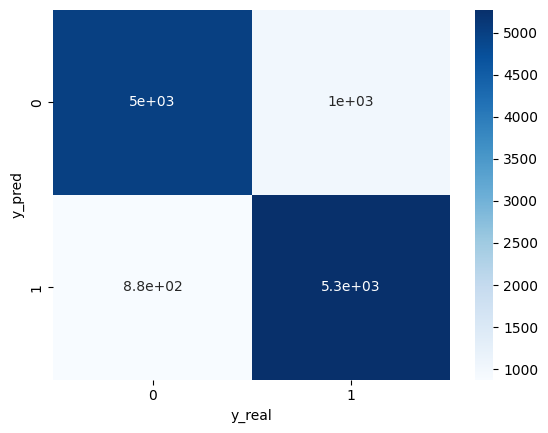

In [ ]:
y_predict = modelo_1.predict(x_test_scaled)
y_predict_cat = np.where(y_predict > 0.4, 1, 0)

ds_validacion = pd.DataFrame(y_predict_cat, y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla = pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues')
plt.show()

##### Métricas de la red

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.87      0.85      0.86     24135
           1       0.86      0.88      0.87     24582

    accuracy                           0.86     48717
   macro avg       0.86      0.86      0.86     48717
weighted avg       0.86      0.86      0.86     48717

F1-Score: 0.8670413488558811


Text(50.722222222222214, 0.5, 'True')

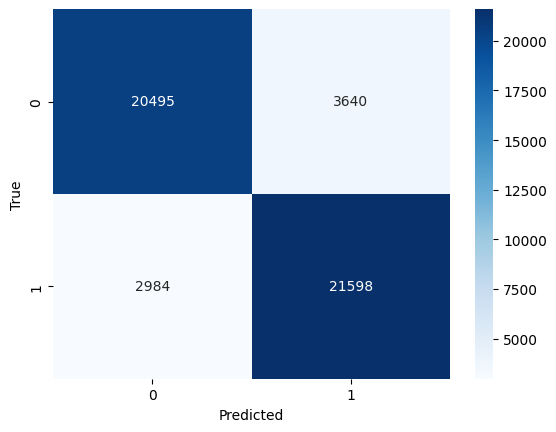

In [ ]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score

#Hago predicción sobre el set de evaluacion
y_pred = modelo_1.predict(x_train_scaled, verbose=False)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_train,y_pred))
print('F1-Score: {}'.format(f1_score(y_train, y_pred, average='binary'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(y_train,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

accuracy = accuracy_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)

Accuracy: 0.8640310363938666
Recall: 0.8786103653079489
F1 Score: 0.8670413488558811
Precision: 0.8557730406529835


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*   Accuracy : 0.8640310363938666

La precisión es una medida que evalúa cuántas de las predicciones del modelo fueron correctas en relación con el total de predicciones realizadas. En este caso, el modelo alcanzó una precisión del 86.40%.

*   Recall : 0.8786103653079489

Recall mide la capacidad del modelo para identificar correctamente todos los casos positivos en el conjunto de datos. Esto significa que el 87.86% de todos los casos positivos presentes en el conjunto de datos fueron identificados correctamente por el modelo.


*  F1 Score: 0.8670413488558811

El F1 Score es una métrica que combina accuracy y recall en una sola puntuación. Es útil cuando se busca un equilibrio entre la capacidad del modelo para predecir correctamente las clases positivas y negativas. En este caso, el F1 Score es de 0.8670413488558811, lo que indica un excelente equilibrio entre accuracy y recall.

*  Precision (Precisión):  0.8557730406529835

La precisión se centra en cuántas de las predicciones positivas del modelo son realmente correctas. Un valor de  0.8557730406529835 significa que el 85.5% de las predicciones positivas realizadas por el modelo son verdaderas.



#####Predicción sobre el dataset de test

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
predict = modelo_1.predict(dataset_test_scaled)

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

 16/830 [..............................] - ETA: 2s 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


830/830 [==============================] - 2s 2ms/step


1    13654
0    12881
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_redneuronal1.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


####Segunda arquitectura
Utilizaremos el triple de capas ocultas que el modelo anterior(6 capas), pero cada una de ellas tendrán 32 neuronas cada una. Además, utilizaremos una función del tipo sigmoide para estas capas.

In [ ]:
def create_model2():
    modelo = keras.Sequential([
        keras.layers.Dense(32, input_shape=(d_in,), activation='relu', kernel_initializer='uniform'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(32, input_shape=(d_in,), activation='relu', kernel_initializer='uniform'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(32, input_shape=(d_in,), activation='relu', kernel_initializer='uniform'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(cant_clases, activation='softmax')
    ])
    modelo.compile(
        optimizer=keras.optimizers.SGD(learning_rate = 0.001),
        loss='categorical_crossentropy',
        metrics=["accuracy"]
    )

    return modelo

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
modelo_2 = KerasClassifier(build_fn=create_model2, verbose=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-44-1c2ac3a14b10>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelo_2 = KerasClassifier(build_fn=create_model2, verbose=1)


##### Validacion Cruzada

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
  'epochs': [8, 16, 32],
  'batch_size': [8, 16, 32]
}
rs = RandomizedSearchCV(estimator = modelo_2, param_distributions = param_grid, cv = 2, n_iter = 4)
rs_result = rs.fit(x_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/32
3045/3045 [==============================] - 18s 5ms/step - loss: 0.6932 - accuracy: 0.5039
Epoch 2/32
3045/3045 [==============================] - 17s 5ms/step - loss: 0.6931 - accuracy: 0.5043
Epoch 3/32
3045/3045 [==============================] - 18s 6ms/step - loss: 0.6930 - accuracy: 0.5083
Epoch 4/32
3045/3045 [==============================] - 7s 2ms/step - loss: 0.6931 - accuracy: 0.5069
Epoch 5/32
3045/3045 [==============================] - 8s 3ms/step - loss: 0.6929 - accuracy: 0.5091
Epoch 6/32
3045/3045 [==============================] - 7s 2ms/step - loss: 0.6928 - accuracy: 0.5128
Epoch 7/32
3045/3045 [==============================] - 7s 2ms/step - loss: 0.6926 - accuracy: 0.5135
Epoch 8/32
3045/3045 [==============================] - 10s 3ms/step - loss: 0.6922 - accuracy: 0.5221
Epoch 9/32
3045/3045 [==============================] - 8s 2ms/step - loss: 0.6919 - accuracy: 0.5327
Epoch 10/32
3045/3045 [==============================] - 8s 3ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


3045/3045 [==============================] - 9s 3ms/step - loss: 0.6931 - accuracy: 0.5036
Epoch 2/32
3045/3045 [==============================] - 8s 2ms/step - loss: 0.6930 - accuracy: 0.5085
Epoch 3/32
3045/3045 [==============================] - 8s 3ms/step - loss: 0.6930 - accuracy: 0.5092
Epoch 4/32
3045/3045 [==============================] - 9s 3ms/step - loss: 0.6929 - accuracy: 0.5086
Epoch 5/32
3045/3045 [==============================] - 8s 3ms/step - loss: 0.6927 - accuracy: 0.5154
Epoch 6/32
3045/3045 [==============================] - 8s 3ms/step - loss: 0.6925 - accuracy: 0.5189
Epoch 7/32
3045/3045 [==============================] - 6s 2ms/step - loss: 0.6919 - accuracy: 0.5327
Epoch 8/32
3045/3045 [==============================] - 8s 3ms/step - loss: 0.6912 - accuracy: 0.5384
Epoch 9/32
3045/3045 [==============================] - 7s 2ms/step - loss: 0.6895 - accuracy: 0.5630
Epoch 10/32
3045/3045 [==============================] - 6s 2ms/step - loss: 0.6863 - accurac

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/8
1523/1523 [==============================] - 5s 2ms/step - loss: 0.6931 - accuracy: 0.5055
Epoch 2/8
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6931 - accuracy: 0.5042
Epoch 3/8
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 4/8
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6931 - accuracy: 0.5044
Epoch 5/8
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6931 - accuracy: 0.5061
Epoch 6/8
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6931 - accuracy: 0.5077
Epoch 7/8
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6930 - accuracy: 0.5082
Epoch 8/8
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6929 - accuracy: 0.5057


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/8
1523/1523 [==============================] - 5s 2ms/step - loss: 0.6931 - accuracy: 0.5094
Epoch 2/8
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6930 - accuracy: 0.5101
Epoch 3/8
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6930 - accuracy: 0.5065
Epoch 4/8
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6929 - accuracy: 0.5079
Epoch 5/8
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6928 - accuracy: 0.5093
Epoch 6/8
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6929 - accuracy: 0.5134
Epoch 7/8
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6928 - accuracy: 0.5185
Epoch 8/8
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6928 - accuracy: 0.5035


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/16
3045/3045 [==============================] - 8s 2ms/step - loss: 0.6931 - accuracy: 0.5059
Epoch 2/16
3045/3045 [==============================] - 7s 2ms/step - loss: 0.6931 - accuracy: 0.5018
Epoch 3/16
3045/3045 [==============================] - 8s 3ms/step - loss: 0.6930 - accuracy: 0.5085
Epoch 4/16
3045/3045 [==============================] - 6s 2ms/step - loss: 0.6928 - accuracy: 0.5098
Epoch 5/16
3045/3045 [==============================] - 9s 3ms/step - loss: 0.6925 - accuracy: 0.5163
Epoch 6/16
3045/3045 [==============================] - 6s 2ms/step - loss: 0.6925 - accuracy: 0.5156
Epoch 7/16
3045/3045 [==============================] - 8s 3ms/step - loss: 0.6919 - accuracy: 0.5255
Epoch 8/16
3045/3045 [==============================] - 10s 3ms/step - loss: 0.6911 - accuracy: 0.5378
Epoch 9/16
3045/3045 [==============================] - 6s 2ms/step - loss: 0.6898 - accuracy: 0.5576
Epoch 10/16
3045/3045 [==============================] - 7s 2ms/step - loss: 0.68

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


3045/3045 [==============================] - 7s 2ms/step - loss: 0.6932 - accuracy: 0.5033
Epoch 2/16
3045/3045 [==============================] - 9s 3ms/step - loss: 0.6930 - accuracy: 0.5068
Epoch 3/16
3045/3045 [==============================] - 6s 2ms/step - loss: 0.6931 - accuracy: 0.5045
Epoch 4/16
3045/3045 [==============================] - 8s 3ms/step - loss: 0.6931 - accuracy: 0.5054
Epoch 5/16
3045/3045 [==============================] - 7s 2ms/step - loss: 0.6930 - accuracy: 0.5038
Epoch 6/16
3045/3045 [==============================] - 6s 2ms/step - loss: 0.6932 - accuracy: 0.5042
Epoch 7/16
3045/3045 [==============================] - 9s 3ms/step - loss: 0.6930 - accuracy: 0.5025
Epoch 8/16
3045/3045 [==============================] - 6s 2ms/step - loss: 0.6931 - accuracy: 0.5061
Epoch 9/16
3045/3045 [==============================] - 7s 2ms/step - loss: 0.6931 - accuracy: 0.5083
Epoch 10/16
3045/3045 [==============================] - 8s 3ms/step - loss: 0.6930 - accurac

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/8
762/762 [==============================] - 4s 3ms/step - loss: 0.6930 - accuracy: 0.5184
Epoch 2/8
762/762 [==============================] - 2s 3ms/step - loss: 0.6930 - accuracy: 0.5152
Epoch 3/8
762/762 [==============================] - 2s 2ms/step - loss: 0.6929 - accuracy: 0.5184
Epoch 4/8
762/762 [==============================] - 2s 2ms/step - loss: 0.6929 - accuracy: 0.5156
Epoch 5/8
762/762 [==============================] - 2s 2ms/step - loss: 0.6928 - accuracy: 0.5223
Epoch 6/8
762/762 [==============================] - 2s 2ms/step - loss: 0.6927 - accuracy: 0.5237
Epoch 7/8
762/762 [==============================] - 2s 2ms/step - loss: 0.6927 - accuracy: 0.5213
Epoch 8/8
762/762 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5077
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


762/762 [==============================] - 3s 2ms/step - loss: 0.6931 - accuracy: 0.5077
Epoch 2/8
762/762 [==============================] - 2s 2ms/step - loss: 0.6929 - accuracy: 0.5135
Epoch 3/8
762/762 [==============================] - 2s 2ms/step - loss: 0.6929 - accuracy: 0.5094
Epoch 4/8
762/762 [==============================] - 2s 2ms/step - loss: 0.6928 - accuracy: 0.5159
Epoch 5/8
762/762 [==============================] - 2s 3ms/step - loss: 0.6928 - accuracy: 0.5133
Epoch 6/8
762/762 [==============================] - 2s 3ms/step - loss: 0.6928 - accuracy: 0.5128
Epoch 7/8
762/762 [==============================] - 2s 3ms/step - loss: 0.6927 - accuracy: 0.5191
Epoch 8/8
762/762 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5037
Epoch 1/32


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


6090/6090 [==============================] - 15s 2ms/step - loss: 0.6931 - accuracy: 0.5019
Epoch 2/32
6090/6090 [==============================] - 13s 2ms/step - loss: 0.6931 - accuracy: 0.5036
Epoch 3/32
6090/6090 [==============================] - 14s 2ms/step - loss: 0.6931 - accuracy: 0.5054
Epoch 4/32
6090/6090 [==============================] - 15s 2ms/step - loss: 0.6930 - accuracy: 0.5086
Epoch 5/32
6090/6090 [==============================] - 15s 2ms/step - loss: 0.6930 - accuracy: 0.5068
Epoch 6/32
6090/6090 [==============================] - 14s 2ms/step - loss: 0.6928 - accuracy: 0.5104
Epoch 7/32
6090/6090 [==============================] - 13s 2ms/step - loss: 0.6926 - accuracy: 0.5164
Epoch 8/32
6090/6090 [==============================] - 15s 2ms/step - loss: 0.6921 - accuracy: 0.5274
Epoch 9/32
6090/6090 [==============================] - 15s 2ms/step - loss: 0.6910 - accuracy: 0.5477
Epoch 10/32
6090/6090 [==============================] - 18s 3ms/step - loss: 0.6876

In [ ]:
#Mejores hiperparametros
print(rs_result.best_params_)
#Mejor métrica
print(rs_result.best_score_)

{'epochs': 32, 'batch_size': 8}
0.813330203294754


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Predicción con mejor estimador
best_network = rs_result.best_estimator_

y_pred = best_network.predict(x_test_scaled)

#Accuracy test
f1_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


381/381 [==============================] - 2s 4ms/step


0.826578621543541

In [ ]:
#Probemos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,test,pred
0,1,1
1,1,1
2,0,0
3,1,0
4,1,1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap

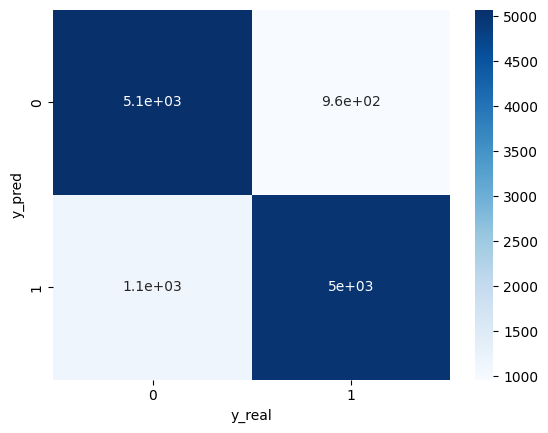

In [ ]:
y_predict = y_pred
y_predict_cat = np.where(y_predict > 0.4, 1, 0)

ds_validacion = pd.DataFrame(y_predict_cat, y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla = pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues')
plt.show()

##### Métricas de la red

In [ ]:
modelo_2 = KerasClassifier(build_fn=create_model2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-42-76cf680ef162>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelo_2 = KerasClassifier(build_fn=create_model2)


In [ ]:
# {'epochs': 32, 'batch_size': 8}
model_metrics = modelo_2.fit(x_train_scaled, y_train,
                                                epochs = 32,
                                                batch_size = 8, verbose=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.85      0.81      0.83     24135
           1       0.82      0.86      0.84     24582

    accuracy                           0.83     48717
   macro avg       0.83      0.83      0.83     48717
weighted avg       0.83      0.83      0.83     48717

F1-Score: 0.8389319209095796


Text(50.722222222222214, 0.5, 'True')

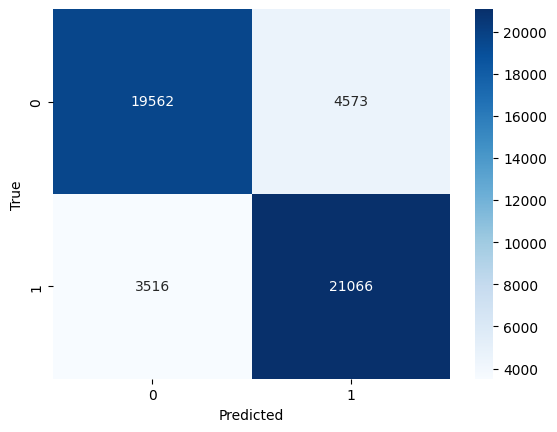

In [ ]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score

#Hago predicción sobre el set de evaluacion
y_pred = modelo_2.predict(x_train_scaled, verbose=False)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_train,y_pred))
print('F1-Score: {}'.format(f1_score(y_train, y_pred, average='binary'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(y_train,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

accuracy = accuracy_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)

Accuracy: 0.833959398156701
Recall: 0.8569685135464974
F1 Score: 0.8389319209095796
Precision: 0.8216389094738484


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*   Accuracy : 0.833959398156701

La precisión es una medida que evalúa cuántas de las predicciones del modelo fueron correctas en relación con el total de predicciones realizadas. En este caso, el modelo alcanzó una precisión del 83.39%.

*   Recall : 0.8569685135464974

Recall mide la capacidad del modelo para identificar correctamente todos los casos positivos en el conjunto de datos. Esto significa que el 85.69% de todos los casos positivos presentes en el conjunto de datos fueron identificados correctamente por el modelo.


*  F1 Score: 0.8389319209095796

El F1 Score es una métrica que combina accuracy y recall en una sola puntuación. Es útil cuando se busca un equilibrio entre la capacidad del modelo para predecir correctamente las clases positivas y negativas. En este caso, el F1 Score es de 0.8389319209095796, lo que indica un excelente equilibrio entre accuracy y recall.

*  Precision (Precisión):  0.8216389094738484

La precisión se centra en cuántas de las predicciones positivas del modelo son realmente correctas. Un valor de  0.8216389094738484 significa que el 85.5% de las predicciones positivas realizadas por el modelo son verdaderas.


##### Prediccion sobre del dataset test

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
predict = best_network.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


830/830 [==============================] - 3s 4ms/step


0    17010
1     9525
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,1
36a4c7b0-d6b1-4528-93db-311be96ec1c6,0


In [ ]:
ds_resultados.to_csv("predicciones_redneuronal5.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap

####Tercera arquitectura
Para esta tercer arquitectura utilizaremos una buena cantidad de capas ocultas(8) y además cada una contará con 32 neuronas. Además, utilizaremos una función de activación del tipo 'relu'.

In [ ]:
def create_model3():
    modelo = keras.Sequential([
        keras.layers.Dense(32, input_shape=(d_in,), activation='relu', kernel_initializer='uniform'),

        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(cant_clases, activation='softmax')
    ])

    modelo.compile(
        optimizer=keras.optimizers.SGD(learning_rate = 0.001),
        loss='categorical_crossentropy',
        metrics=["accuracy"]
    )

    return modelo

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
modelo_3 = KerasClassifier(build_fn=create_model3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-22-0d485d91d0ea>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelo_3 = KerasClassifier(build_fn=create_model3)


#####Validación cruzada

Optimizamos los hiperparámetros con Grid Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
  'epochs': [64, 128, 256],
  'batch_size': [8, 16, 32]
}
rs = RandomizedSearchCV(estimator = modelo_3, param_distributions = param_grid, cv = 2, n_iter = 4)
rs_result = rs.fit(x_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)
<frozen importlib._bootstrap>:914: ImportWarning: APICo

Epoch 1/256
3045/3045 [==============================] - 23s 6ms/step - loss: 0.6947 - accuracy: 0.5046
Epoch 2/256
3045/3045 [==============================] - 18s 6ms/step - loss: 0.6940 - accuracy: 0.5019
Epoch 3/256
3045/3045 [==============================] - 13s 4ms/step - loss: 0.6928 - accuracy: 0.5259
Epoch 4/256
3045/3045 [==============================] - 11s 4ms/step - loss: 0.6881 - accuracy: 0.5718
Epoch 5/256
3045/3045 [==============================] - 7s 2ms/step - loss: 0.6823 - accuracy: 0.6062
Epoch 6/256
3045/3045 [==============================] - 9s 3ms/step - loss: 0.6709 - accuracy: 0.6353
Epoch 7/256
3045/3045 [==============================] - 6s 2ms/step - loss: 0.6555 - accuracy: 0.6516
Epoch 8/256
3045/3045 [==============================] - 9s 3ms/step - loss: 0.6367 - accuracy: 0.6693
Epoch 9/256
3045/3045 [==============================] - 7s 2ms/step - loss: 0.6238 - accuracy: 0.6759
Epoch 10/256
3045/3045 [==============================] - 8s 3ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/256
3045/3045 [==============================] - 10s 3ms/step - loss: 0.6937 - accuracy: 0.5163
Epoch 2/256
3045/3045 [==============================] - 7s 2ms/step - loss: 0.6885 - accuracy: 0.5623
Epoch 3/256
3045/3045 [==============================] - 8s 3ms/step - loss: 0.6812 - accuracy: 0.5915
Epoch 4/256
3045/3045 [==============================] - 8s 3ms/step - loss: 0.6684 - accuracy: 0.6343
Epoch 5/256
3045/3045 [==============================] - 6s 2ms/step - loss: 0.6469 - accuracy: 0.6641
Epoch 6/256
3045/3045 [==============================] - 9s 3ms/step - loss: 0.6194 - accuracy: 0.6884
Epoch 7/256
3045/3045 [==============================] - 6s 2ms/step - loss: 0.6058 - accuracy: 0.6963
Epoch 8/256
3045/3045 [==============================] - 8s 3ms/step - loss: 0.5944 - accuracy: 0.7000
Epoch 9/256
3045/3045 [==============================] - 7s 2ms/step - loss: 0.5924 - accuracy: 0.7056
Epoch 10/256
3045/3045 [==============================] - 7s 2ms/step - 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/64
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6940 - accuracy: 0.5174
Epoch 2/64
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6938 - accuracy: 0.5270
Epoch 3/64
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6916 - accuracy: 0.5445
Epoch 4/64
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6876 - accuracy: 0.5667
Epoch 5/64
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6840 - accuracy: 0.5849
Epoch 6/64
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6769 - accuracy: 0.6115
Epoch 7/64
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6710 - accuracy: 0.6227
Epoch 8/64
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6609 - accuracy: 0.6407
Epoch 9/64
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6507 - accuracy: 0.6535
Epoch 10/64
1523/1523 [==============================] - 5s 3ms/step - loss: 0.641

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/64
1523/1523 [==============================] - 4s 2ms/step - loss: 0.6984 - accuracy: 0.5134
Epoch 2/64
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6904 - accuracy: 0.5453
Epoch 3/64
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6773 - accuracy: 0.5906
Epoch 4/64
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6554 - accuracy: 0.6388
Epoch 5/64
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6285 - accuracy: 0.6729
Epoch 6/64
1523/1523 [==============================] - 3s 2ms/step - loss: 0.5960 - accuracy: 0.6996
Epoch 7/64
1523/1523 [==============================] - 4s 2ms/step - loss: 0.5721 - accuracy: 0.7170
Epoch 8/64
1523/1523 [==============================] - 5s 3ms/step - loss: 0.5620 - accuracy: 0.7215
Epoch 9/64
1523/1523 [==============================] - 4s 3ms/step - loss: 0.5494 - accuracy: 0.7220
Epoch 10/64
1523/1523 [==============================] - 3s 2ms/step - loss: 0.540

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/128
3045/3045 [==============================] - 8s 2ms/step - loss: 0.6903 - accuracy: 0.5533
Epoch 2/128
3045/3045 [==============================] - 8s 3ms/step - loss: 0.6691 - accuracy: 0.6189
Epoch 3/128
3045/3045 [==============================] - 8s 2ms/step - loss: 0.6444 - accuracy: 0.6544
Epoch 4/128
3045/3045 [==============================] - 7s 2ms/step - loss: 0.6286 - accuracy: 0.6670
Epoch 5/128
3045/3045 [==============================] - 8s 3ms/step - loss: 0.6125 - accuracy: 0.6824
Epoch 6/128
3045/3045 [==============================] - 7s 2ms/step - loss: 0.6007 - accuracy: 0.6870
Epoch 7/128
3045/3045 [==============================] - 9s 3ms/step - loss: 0.5903 - accuracy: 0.6980
Epoch 8/128
3045/3045 [==============================] - 6s 2ms/step - loss: 0.5812 - accuracy: 0.7067
Epoch 9/128
3045/3045 [==============================] - 8s 3ms/step - loss: 0.5725 - accuracy: 0.7140
Epoch 10/128
3045/3045 [==============================] - 7s 2ms/step - l

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


3045/3045 [==============================] - 8s 2ms/step - loss: 0.6939 - accuracy: 0.5011
Epoch 2/128
3045/3045 [==============================] - 9s 3ms/step - loss: 0.6928 - accuracy: 0.5093
Epoch 3/128
3045/3045 [==============================] - 7s 2ms/step - loss: 0.6901 - accuracy: 0.5123
Epoch 4/128
3045/3045 [==============================] - 8s 3ms/step - loss: 0.6797 - accuracy: 0.5837
Epoch 5/128
3045/3045 [==============================] - 7s 2ms/step - loss: 0.6562 - accuracy: 0.6377
Epoch 6/128
3045/3045 [==============================] - 7s 2ms/step - loss: 0.6166 - accuracy: 0.6828
Epoch 7/128
3045/3045 [==============================] - 8s 3ms/step - loss: 0.5749 - accuracy: 0.7071
Epoch 8/128
3045/3045 [==============================] - 6s 2ms/step - loss: 0.5499 - accuracy: 0.7222
Epoch 9/128
3045/3045 [==============================] - 9s 3ms/step - loss: 0.5426 - accuracy: 0.7264
Epoch 10/128
3045/3045 [==============================] - 6s 2ms/step - loss: 0.5333 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/64
762/762 [==============================] - 4s 2ms/step - loss: 0.6944 - accuracy: 0.5100
Epoch 2/64
762/762 [==============================] - 2s 2ms/step - loss: 0.6926 - accuracy: 0.5225
Epoch 3/64
762/762 [==============================] - 2s 3ms/step - loss: 0.6929 - accuracy: 0.5251
Epoch 4/64
762/762 [==============================] - 3s 3ms/step - loss: 0.6927 - accuracy: 0.5332
Epoch 5/64
762/762 [==============================] - 3s 4ms/step - loss: 0.6912 - accuracy: 0.5422
Epoch 6/64
762/762 [==============================] - 2s 3ms/step - loss: 0.6896 - accuracy: 0.5564
Epoch 7/64
762/762 [==============================] - 2s 2ms/step - loss: 0.6878 - accuracy: 0.5689
Epoch 8/64
762/762 [==============================] - 2s 2ms/step - loss: 0.6860 - accuracy: 0.5826
Epoch 9/64
762/762 [==============================] - 2s 2ms/step - loss: 0.6846 - accuracy: 0.5848
Epoch 10/64
762/762 [==============================] - 2s 3ms/step - loss: 0.6825 - accuracy: 0.5978

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/64
762/762 [==============================] - 3s 3ms/step - loss: 0.6949 - accuracy: 0.4977
Epoch 2/64
762/762 [==============================] - 3s 3ms/step - loss: 0.6940 - accuracy: 0.5121
Epoch 3/64
762/762 [==============================] - 3s 4ms/step - loss: 0.6942 - accuracy: 0.5150
Epoch 4/64
762/762 [==============================] - 2s 3ms/step - loss: 0.6940 - accuracy: 0.5128
Epoch 5/64
762/762 [==============================] - 2s 3ms/step - loss: 0.6933 - accuracy: 0.5202
Epoch 6/64
762/762 [==============================] - 2s 3ms/step - loss: 0.6934 - accuracy: 0.5217
Epoch 7/64
762/762 [==============================] - 2s 3ms/step - loss: 0.6925 - accuracy: 0.5260
Epoch 8/64
762/762 [==============================] - 2s 3ms/step - loss: 0.6924 - accuracy: 0.5276
Epoch 9/64
762/762 [==============================] - 2s 3ms/step - loss: 0.6916 - accuracy: 0.5387
Epoch 10/64
762/762 [==============================] - 3s 4ms/step - loss: 0.6909 - accuracy: 0.5467

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/128
6090/6090 [==============================] - 17s 2ms/step - loss: 0.6959 - accuracy: 0.5044
Epoch 2/128
6090/6090 [==============================] - 15s 2ms/step - loss: 0.6936 - accuracy: 0.5215
Epoch 3/128
6090/6090 [==============================] - 16s 3ms/step - loss: 0.6878 - accuracy: 0.5722
Epoch 4/128
6090/6090 [==============================] - 15s 3ms/step - loss: 0.6708 - accuracy: 0.6288
Epoch 5/128
6090/6090 [==============================] - 15s 3ms/step - loss: 0.6379 - accuracy: 0.6693
Epoch 6/128
6090/6090 [==============================] - 17s 3ms/step - loss: 0.6099 - accuracy: 0.6875
Epoch 7/128
6090/6090 [==============================] - 16s 3ms/step - loss: 0.5961 - accuracy: 0.6958
Epoch 8/128
6090/6090 [==============================] - 15s 2ms/step - loss: 0.5837 - accuracy: 0.7028
Epoch 9/128
6090/6090 [==============================] - 14s 2ms/step - loss: 0.5718 - accuracy: 0.7128
Epoch 10/128
6090/6090 [==============================] - 15s 2m

In [ ]:
#Mejores hiperparametros
print(rs_result.best_params_)
#Mejor métrica
print(rs_result.best_score_)

{'epochs': 128, 'batch_size': 8}
0.7565929293632507


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Predicción con mejor estimador
best_network = rs_result.best_estimator_

y_pred = best_network.predict(x_test_scaled)

#Accuracy test
f1_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


381/381 [==============================] - 1s 1ms/step


0.7757637216377234

In [ ]:
#Probemos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,test,pred
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap

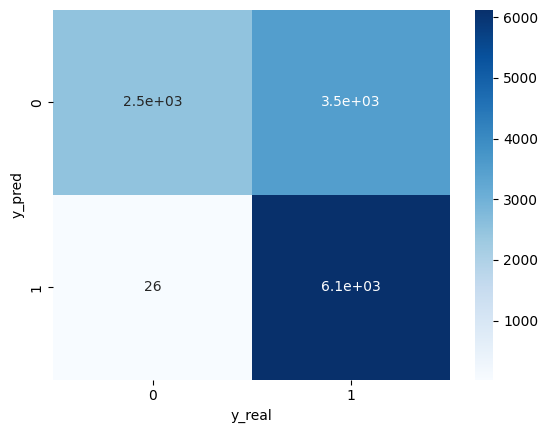

In [ ]:
y_predict = y_pred
y_predict_cat = np.where(y_predict > 0.4, 1, 0)

ds_validacion = pd.DataFrame(y_predict_cat, y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla = pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues')
plt.show()

##### Métricas de la red

In [ ]:
modelo_4 = KerasClassifier(build_fn=create_model3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-29-231eb968c2e8>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelo_4 = KerasClassifier(build_fn=create_model3)


In [ ]:
#{'epochs': 128, 'batch_size': 8}
model_metrics = modelo_4.fit(x_train_scaled, y_train,
                                                epochs = 128,
                                                batch_size = 8, verbose=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.98      0.50      0.66     24135
           1       0.67      0.99      0.80     24582

    accuracy                           0.75     48717
   macro avg       0.82      0.75      0.73     48717
weighted avg       0.82      0.75      0.73     48717

F1-Score: 0.7982299434565271


Text(50.722222222222214, 0.5, 'True')

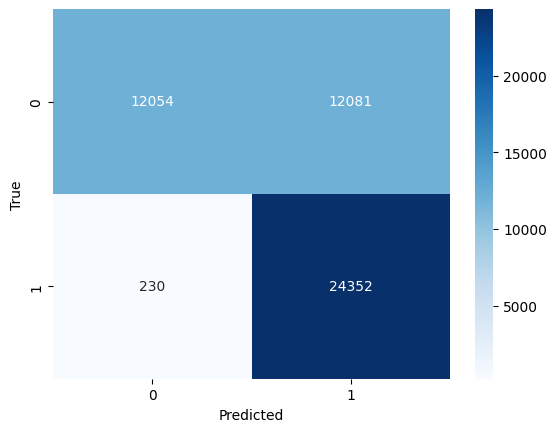

In [ ]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score

#Hago predicción sobre el set de evaluacion
y_pred = modelo_4.predict(x_train_scaled, verbose=False)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_train,y_pred))
print('F1-Score: {}'.format(f1_score(y_train, y_pred, average='binary'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(y_train,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

accuracy = accuracy_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)

Accuracy: 0.7472956052302071
Recall: 0.9906435603286958
F1 Score: 0.7982299434565271
Precision: 0.6684050174292537


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*   Accuracy : 0.7472956052302071

La precisión es una medida que evalúa cuántas de las predicciones del modelo fueron correctas en relación con el total de predicciones realizadas. En este caso, el modelo alcanzó una precisión del 74.72%.

*   Recall : 0.9906435603286958

Recall mide la capacidad del modelo para identificar correctamente todos los casos positivos en el conjunto de datos. Esto significa que el 99.06% de todos los casos positivos presentes en el conjunto de datos fueron identificados correctamente por el modelo.


*  F1 Score: 0.7982299434565271

El F1 Score es una métrica que combina accuracy y recall en una sola puntuación. Es útil cuando se busca un equilibrio entre la capacidad del modelo para predecir correctamente las clases positivas y negativas. En este caso, el F1 Score es de 0.7982299434565271, lo que indica un excelente equilibrio entre accuracy y recall.

*  Precision (Precisión):  0.6684050174292537

La precisión se centra en cuántas de las predicciones positivas del modelo son realmente correctas. Un valor de  0.6684050174292537 significa que el 66.84% de las predicciones positivas realizadas por el modelo son verdaderas.


#####Predicción sobre el dataset de test

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
predict = modelo_4.predict(dataset_test_scaled)

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


830/830 [==============================] - 3s 4ms/step


1    20033
0     6502
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,1
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_redneuronal7.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap

####Cuarta arquitectura

##### Primera Optimización de hiperparámetros

In [ ]:
def create_model4():
    modelo = keras.Sequential([
        keras.layers.Dense(128, input_shape=(d_in,), activation='relu', kernel_initializer='uniform'),

        keras.layers.Dense(64, input_shape=(d_in,), activation='relu', kernel_initializer='uniform'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(cant_clases, activation='softmax')
    ])

    modelo.compile(
        optimizer=keras.optimizers.SGD(learning_rate = 0.001),
        loss='categorical_crossentropy',
        metrics=["accuracy"]
    )

    return modelo

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
modelo_4 = KerasClassifier(build_fn=create_model4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-17-afdb08dcf0b2>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelo_4 = KerasClassifier(build_fn=create_model4)


###### Validación cruzada

Optimizamos los hiperparámetros con Grid Search CV

In [ ]:
param_grid = {
  'epochs': [8, 16, 32, 64],
  'batch_size': [8, 16, 32, 64]
}
print(param_grid)

grid = GridSearchCV(estimator = modelo_4, param_grid = param_grid, cv = 2)
grid_result = grid.fit(x_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


{'epochs': [8, 16, 32, 64], 'batch_size': [8, 16, 32, 64]}


<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen 

Epoch 1/8
3045/3045 [==============================] - 24s 6ms/step - loss: 0.6899 - accuracy: 0.5504
Epoch 2/8
3045/3045 [==============================] - 9s 3ms/step - loss: 0.6754 - accuracy: 0.6141
Epoch 3/8
3045/3045 [==============================] - 7s 2ms/step - loss: 0.6471 - accuracy: 0.6548
Epoch 4/8
3045/3045 [==============================] - 10s 3ms/step - loss: 0.6148 - accuracy: 0.6854
Epoch 5/8
3045/3045 [==============================] - 7s 2ms/step - loss: 0.5963 - accuracy: 0.6973
Epoch 6/8
3045/3045 [==============================] - 9s 3ms/step - loss: 0.5744 - accuracy: 0.7119
Epoch 7/8
3045/3045 [==============================] - 7s 2ms/step - loss: 0.5556 - accuracy: 0.7250
Epoch 8/8
3045/3045 [==============================] - 5s 2ms/step - loss: 0.5105 - accuracy: 0.7605


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/8
3045/3045 [==============================] - 11s 3ms/step - loss: 0.6923 - accuracy: 0.5172
Epoch 2/8
3045/3045 [==============================] - 7s 2ms/step - loss: 0.6849 - accuracy: 0.5689
Epoch 3/8
3045/3045 [==============================] - 10s 3ms/step - loss: 0.6603 - accuracy: 0.6283
Epoch 4/8
3045/3045 [==============================] - 8s 3ms/step - loss: 0.6032 - accuracy: 0.7028
Epoch 5/8
3045/3045 [==============================] - 9s 3ms/step - loss: 0.5535 - accuracy: 0.7270
Epoch 6/8
3045/3045 [==============================] - 8s 3ms/step - loss: 0.5266 - accuracy: 0.7380
Epoch 7/8
3045/3045 [==============================] - 8s 3ms/step - loss: 0.5166 - accuracy: 0.7449
Epoch 8/8
3045/3045 [==============================] - 5s 2ms/step - loss: 0.4909 - accuracy: 0.7551
Epoch 1/16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


3045/3045 [==============================] - 11s 3ms/step - loss: 0.6932 - accuracy: 0.5079
Epoch 2/16
3045/3045 [==============================] - 7s 2ms/step - loss: 0.6925 - accuracy: 0.5232
Epoch 3/16
3045/3045 [==============================] - 10s 3ms/step - loss: 0.6905 - accuracy: 0.5422
Epoch 4/16
3045/3045 [==============================] - 8s 3ms/step - loss: 0.6867 - accuracy: 0.5642
Epoch 5/16
3045/3045 [==============================] - 12s 4ms/step - loss: 0.6800 - accuracy: 0.5868
Epoch 6/16
3045/3045 [==============================] - 7s 2ms/step - loss: 0.6667 - accuracy: 0.6191
Epoch 7/16
3045/3045 [==============================] - 11s 4ms/step - loss: 0.6433 - accuracy: 0.6565
Epoch 8/16
3045/3045 [==============================] - 7s 2ms/step - loss: 0.6199 - accuracy: 0.6815
Epoch 9/16
3045/3045 [==============================] - 10s 3ms/step - loss: 0.5979 - accuracy: 0.6962
Epoch 10/16
3045/3045 [==============================] - 7s 2ms/step - loss: 0.5851 - ac

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/16
3045/3045 [==============================] - 10s 3ms/step - loss: 0.6891 - accuracy: 0.5512
Epoch 2/16
3045/3045 [==============================] - 7s 2ms/step - loss: 0.6761 - accuracy: 0.6146
Epoch 3/16
3045/3045 [==============================] - 10s 3ms/step - loss: 0.6457 - accuracy: 0.6589
Epoch 4/16
3045/3045 [==============================] - 7s 2ms/step - loss: 0.6142 - accuracy: 0.6935
Epoch 5/16
3045/3045 [==============================] - 10s 3ms/step - loss: 0.5817 - accuracy: 0.7185
Epoch 6/16
3045/3045 [==============================] - 7s 2ms/step - loss: 0.5640 - accuracy: 0.7214
Epoch 7/16
3045/3045 [==============================] - 9s 3ms/step - loss: 0.5493 - accuracy: 0.7307
Epoch 8/16
3045/3045 [==============================] - 10s 3ms/step - loss: 0.5326 - accuracy: 0.7422
Epoch 9/16
3045/3045 [==============================] - 10s 3ms/step - loss: 0.5160 - accuracy: 0.7545
Epoch 10/16
3045/3045 [==============================] - 7s 2ms/step - loss: 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


3045/3045 [==============================] - 11s 3ms/step - loss: 0.6922 - accuracy: 0.5230
Epoch 2/32
3045/3045 [==============================] - 8s 2ms/step - loss: 0.6883 - accuracy: 0.5590
Epoch 3/32
3045/3045 [==============================] - 10s 3ms/step - loss: 0.6796 - accuracy: 0.5943
Epoch 4/32
3045/3045 [==============================] - 8s 2ms/step - loss: 0.6629 - accuracy: 0.6296
Epoch 5/32
3045/3045 [==============================] - 9s 3ms/step - loss: 0.6403 - accuracy: 0.6630
Epoch 6/32
3045/3045 [==============================] - 8s 3ms/step - loss: 0.6184 - accuracy: 0.6818
Epoch 7/32
3045/3045 [==============================] - 8s 3ms/step - loss: 0.6014 - accuracy: 0.6925
Epoch 8/32
3045/3045 [==============================] - 8s 3ms/step - loss: 0.5820 - accuracy: 0.7058
Epoch 9/32
3045/3045 [==============================] - 8s 3ms/step - loss: 0.5675 - accuracy: 0.7184
Epoch 10/32
3045/3045 [==============================] - 9s 3ms/step - loss: 0.5519 - accur

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/32
3045/3045 [==============================] - 12s 3ms/step - loss: 0.6932 - accuracy: 0.5040
Epoch 2/32
3045/3045 [==============================] - 8s 3ms/step - loss: 0.6902 - accuracy: 0.5305
Epoch 3/32
3045/3045 [==============================] - 9s 3ms/step - loss: 0.6837 - accuracy: 0.5658
Epoch 4/32
3045/3045 [==============================] - 9s 3ms/step - loss: 0.6652 - accuracy: 0.6316
Epoch 5/32
3045/3045 [==============================] - 8s 3ms/step - loss: 0.6228 - accuracy: 0.6837
Epoch 6/32
3045/3045 [==============================] - 9s 3ms/step - loss: 0.5666 - accuracy: 0.7207
Epoch 7/32
3045/3045 [==============================] - 8s 3ms/step - loss: 0.5401 - accuracy: 0.7311
Epoch 8/32
3045/3045 [==============================] - 9s 3ms/step - loss: 0.5235 - accuracy: 0.7435
Epoch 9/32
3045/3045 [==============================] - 7s 2ms/step - loss: 0.5141 - accuracy: 0.7479
Epoch 10/32
3045/3045 [==============================] - 10s 3ms/step - loss: 0.5

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


3045/3045 [==============================] - 8s 2ms/step - loss: 0.6929 - accuracy: 0.5131
Epoch 2/64
3045/3045 [==============================] - 10s 3ms/step - loss: 0.6923 - accuracy: 0.5261
Epoch 3/64
3045/3045 [==============================] - 7s 2ms/step - loss: 0.6896 - accuracy: 0.5567
Epoch 4/64
3045/3045 [==============================] - 11s 4ms/step - loss: 0.6840 - accuracy: 0.5890
Epoch 5/64
3045/3045 [==============================] - 9s 3ms/step - loss: 0.6755 - accuracy: 0.6081
Epoch 6/64
3045/3045 [==============================] - 7s 2ms/step - loss: 0.6589 - accuracy: 0.6361
Epoch 7/64
3045/3045 [==============================] - 9s 3ms/step - loss: 0.6371 - accuracy: 0.6613
Epoch 8/64
3045/3045 [==============================] - 7s 2ms/step - loss: 0.6138 - accuracy: 0.6881
Epoch 9/64
3045/3045 [==============================] - 10s 3ms/step - loss: 0.5995 - accuracy: 0.6988
Epoch 10/64
3045/3045 [==============================] - 7s 2ms/step - loss: 0.5813 - accu

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/64
3045/3045 [==============================] - 10s 3ms/step - loss: 0.6922 - accuracy: 0.5254
Epoch 2/64
3045/3045 [==============================] - 8s 3ms/step - loss: 0.6889 - accuracy: 0.5549
Epoch 3/64
3045/3045 [==============================] - 9s 3ms/step - loss: 0.6804 - accuracy: 0.5983
Epoch 4/64
3045/3045 [==============================] - 8s 3ms/step - loss: 0.6651 - accuracy: 0.6340
Epoch 5/64
3045/3045 [==============================] - 9s 3ms/step - loss: 0.6400 - accuracy: 0.6643
Epoch 6/64
3045/3045 [==============================] - 7s 2ms/step - loss: 0.6103 - accuracy: 0.6979
Epoch 7/64
3045/3045 [==============================] - 9s 3ms/step - loss: 0.5969 - accuracy: 0.7082
Epoch 8/64
3045/3045 [==============================] - 7s 2ms/step - loss: 0.5831 - accuracy: 0.7158
Epoch 9/64
3045/3045 [==============================] - 10s 3ms/step - loss: 0.5633 - accuracy: 0.7306
Epoch 10/64
3045/3045 [==============================] - 7s 2ms/step - loss: 0.5

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/8
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6913 - accuracy: 0.5309
Epoch 2/8
1523/1523 [==============================] - 4s 2ms/step - loss: 0.6865 - accuracy: 0.5723
Epoch 3/8
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6780 - accuracy: 0.6038
Epoch 4/8
1523/1523 [==============================] - 5s 4ms/step - loss: 0.6628 - accuracy: 0.6349
Epoch 5/8
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6459 - accuracy: 0.6574
Epoch 6/8
1523/1523 [==============================] - 4s 2ms/step - loss: 0.6259 - accuracy: 0.6786
Epoch 7/8
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6089 - accuracy: 0.6939
Epoch 8/8
1523/1523 [==============================] - 3s 2ms/step - loss: 0.5548 - accuracy: 0.7539
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


1523/1523 [==============================] - 5s 3ms/step - loss: 0.6928 - accuracy: 0.5108
Epoch 2/8
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6926 - accuracy: 0.5207
Epoch 3/8
1523/1523 [==============================] - 6s 4ms/step - loss: 0.6922 - accuracy: 0.5295
Epoch 4/8
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6916 - accuracy: 0.5360
Epoch 5/8
1523/1523 [==============================] - 4s 2ms/step - loss: 0.6904 - accuracy: 0.5479
Epoch 6/8
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6880 - accuracy: 0.5699
Epoch 7/8
1523/1523 [==============================] - 6s 4ms/step - loss: 0.6843 - accuracy: 0.5890
Epoch 8/8
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6687 - accuracy: 0.7080
Epoch 1/16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


1523/1523 [==============================] - 6s 3ms/step - loss: 0.6929 - accuracy: 0.5061
Epoch 2/16
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6921 - accuracy: 0.5321
Epoch 3/16
1523/1523 [==============================] - 4s 2ms/step - loss: 0.6896 - accuracy: 0.5588
Epoch 4/16
1523/1523 [==============================] - 4s 2ms/step - loss: 0.6866 - accuracy: 0.5760
Epoch 5/16
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6816 - accuracy: 0.5986
Epoch 6/16
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6739 - accuracy: 0.6218
Epoch 7/16
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6633 - accuracy: 0.6397
Epoch 8/16
1523/1523 [==============================] - 4s 2ms/step - loss: 0.6473 - accuracy: 0.6623
Epoch 9/16
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6293 - accuracy: 0.6815
Epoch 10/16
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6103 - accurac

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/16
1523/1523 [==============================] - 7s 4ms/step - loss: 0.6930 - accuracy: 0.5116
Epoch 2/16
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6922 - accuracy: 0.5193
Epoch 3/16
1523/1523 [==============================] - 4s 2ms/step - loss: 0.6908 - accuracy: 0.5299
Epoch 4/16
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6897 - accuracy: 0.5380
Epoch 5/16
1523/1523 [==============================] - 6s 4ms/step - loss: 0.6873 - accuracy: 0.5541
Epoch 6/16
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6837 - accuracy: 0.5696
Epoch 7/16
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6790 - accuracy: 0.5905
Epoch 8/16
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6739 - accuracy: 0.5949
Epoch 9/16
1523/1523 [==============================] - 6s 4ms/step - loss: 0.6645 - accuracy: 0.6146
Epoch 10/16
1523/1523 [==============================] - 4s 3ms/step - loss: 0.653

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/32
1523/1523 [==============================] - 6s 3ms/step - loss: 0.6929 - accuracy: 0.5107
Epoch 2/32
1523/1523 [==============================] - 4s 2ms/step - loss: 0.6922 - accuracy: 0.5315
Epoch 3/32
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6909 - accuracy: 0.5532
Epoch 4/32
1523/1523 [==============================] - 6s 4ms/step - loss: 0.6883 - accuracy: 0.5739
Epoch 5/32
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6854 - accuracy: 0.5974
Epoch 6/32
1523/1523 [==============================] - 4s 2ms/step - loss: 0.6806 - accuracy: 0.6218
Epoch 7/32
1523/1523 [==============================] - 4s 2ms/step - loss: 0.6738 - accuracy: 0.6347
Epoch 8/32
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6621 - accuracy: 0.6639
Epoch 9/32
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6503 - accuracy: 0.6693
Epoch 10/32
1523/1523 [==============================] - 4s 2ms/step - loss: 0.631

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/32
1523/1523 [==============================] - 4s 2ms/step - loss: 0.6915 - accuracy: 0.5230
Epoch 2/32
1523/1523 [==============================] - 4s 2ms/step - loss: 0.6818 - accuracy: 0.5741
Epoch 3/32
1523/1523 [==============================] - 5s 4ms/step - loss: 0.6615 - accuracy: 0.6309
Epoch 4/32
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6233 - accuracy: 0.6794
Epoch 5/32
1523/1523 [==============================] - 4s 2ms/step - loss: 0.5816 - accuracy: 0.7073
Epoch 6/32
1523/1523 [==============================] - 4s 2ms/step - loss: 0.5497 - accuracy: 0.7293
Epoch 7/32
1523/1523 [==============================] - 5s 4ms/step - loss: 0.5313 - accuracy: 0.7377
Epoch 8/32
1523/1523 [==============================] - 5s 3ms/step - loss: 0.5185 - accuracy: 0.7453
Epoch 9/32
1523/1523 [==============================] - 4s 2ms/step - loss: 0.5111 - accuracy: 0.7472
Epoch 10/32
1523/1523 [==============================] - 5s 3ms/step - loss: 0.503

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


1523/1523 [==============================] - 5s 2ms/step - loss: 0.6925 - accuracy: 0.5211
Epoch 2/64
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6911 - accuracy: 0.5503
Epoch 3/64
1523/1523 [==============================] - 6s 4ms/step - loss: 0.6886 - accuracy: 0.5700
Epoch 4/64
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6844 - accuracy: 0.5869
Epoch 5/64
1523/1523 [==============================] - 4s 2ms/step - loss: 0.6791 - accuracy: 0.6052
Epoch 6/64
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6715 - accuracy: 0.6247
Epoch 7/64
1523/1523 [==============================] - 6s 4ms/step - loss: 0.6621 - accuracy: 0.6386
Epoch 8/64
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6471 - accuracy: 0.6596
Epoch 9/64
1523/1523 [==============================] - 4s 2ms/step - loss: 0.6371 - accuracy: 0.6696
Epoch 10/64
1523/1523 [==============================] - 4s 2ms/step - loss: 0.6228 - accurac

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/64
1523/1523 [==============================] - 5s 2ms/step - loss: 0.6924 - accuracy: 0.5264
Epoch 2/64
1523/1523 [==============================] - 4s 2ms/step - loss: 0.6912 - accuracy: 0.5433
Epoch 3/64
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6885 - accuracy: 0.5621
Epoch 4/64
1523/1523 [==============================] - 6s 4ms/step - loss: 0.6832 - accuracy: 0.5894
Epoch 5/64
1523/1523 [==============================] - 4s 2ms/step - loss: 0.6767 - accuracy: 0.6114
Epoch 6/64
1523/1523 [==============================] - 4s 2ms/step - loss: 0.6659 - accuracy: 0.6355
Epoch 7/64
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6516 - accuracy: 0.6585
Epoch 8/64
1523/1523 [==============================] - 6s 4ms/step - loss: 0.6374 - accuracy: 0.6715
Epoch 9/64
1523/1523 [==============================] - 4s 2ms/step - loss: 0.6188 - accuracy: 0.6898
Epoch 10/64
1523/1523 [==============================] - 4s 2ms/step - loss: 0.609

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/8
762/762 [==============================] - 4s 4ms/step - loss: 0.6932 - accuracy: 0.5053
Epoch 2/8
762/762 [==============================] - 3s 4ms/step - loss: 0.6926 - accuracy: 0.5146
Epoch 3/8
762/762 [==============================] - 2s 3ms/step - loss: 0.6920 - accuracy: 0.5289
Epoch 4/8
762/762 [==============================] - 2s 3ms/step - loss: 0.6909 - accuracy: 0.5383
Epoch 5/8
762/762 [==============================] - 2s 3ms/step - loss: 0.6895 - accuracy: 0.5491
Epoch 6/8
762/762 [==============================] - 2s 3ms/step - loss: 0.6872 - accuracy: 0.5645
Epoch 7/8
762/762 [==============================] - 2s 3ms/step - loss: 0.6848 - accuracy: 0.5722
Epoch 8/8
762/762 [==============================] - 2s 3ms/step - loss: 0.6701 - accuracy: 0.7295
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


762/762 [==============================] - 3s 3ms/step - loss: 0.6933 - accuracy: 0.5062
Epoch 2/8
762/762 [==============================] - 2s 3ms/step - loss: 0.6926 - accuracy: 0.5176
Epoch 3/8
762/762 [==============================] - 2s 3ms/step - loss: 0.6920 - accuracy: 0.5225
Epoch 4/8
762/762 [==============================] - 2s 3ms/step - loss: 0.6914 - accuracy: 0.5233
Epoch 5/8
762/762 [==============================] - 3s 4ms/step - loss: 0.6898 - accuracy: 0.5412
Epoch 6/8
762/762 [==============================] - 3s 4ms/step - loss: 0.6883 - accuracy: 0.5493
Epoch 7/8
762/762 [==============================] - 3s 4ms/step - loss: 0.6867 - accuracy: 0.5617
Epoch 8/8
762/762 [==============================] - 2s 2ms/step - loss: 0.6751 - accuracy: 0.7017
Epoch 1/16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


762/762 [==============================] - 3s 3ms/step - loss: 0.6935 - accuracy: 0.4993
Epoch 2/16
762/762 [==============================] - 2s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 3/16
762/762 [==============================] - 2s 3ms/step - loss: 0.6932 - accuracy: 0.5046
Epoch 4/16
762/762 [==============================] - 3s 4ms/step - loss: 0.6929 - accuracy: 0.5073
Epoch 5/16
762/762 [==============================] - 3s 4ms/step - loss: 0.6924 - accuracy: 0.5191
Epoch 6/16
762/762 [==============================] - 2s 3ms/step - loss: 0.6926 - accuracy: 0.5161
Epoch 7/16
762/762 [==============================] - 2s 3ms/step - loss: 0.6922 - accuracy: 0.5206
Epoch 8/16
762/762 [==============================] - 2s 3ms/step - loss: 0.6918 - accuracy: 0.5257
Epoch 9/16
762/762 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5388
Epoch 10/16
762/762 [==============================] - 2s 2ms/step - loss: 0.6903 - accuracy: 0.5446
Epoch 11/1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


762/762 [==============================] - 4s 4ms/step - loss: 0.6935 - accuracy: 0.4964
Epoch 2/16
762/762 [==============================] - 3s 4ms/step - loss: 0.6931 - accuracy: 0.5087
Epoch 3/16
762/762 [==============================] - 3s 3ms/step - loss: 0.6932 - accuracy: 0.5067
Epoch 4/16
762/762 [==============================] - 2s 3ms/step - loss: 0.6929 - accuracy: 0.5134
Epoch 5/16
762/762 [==============================] - 2s 3ms/step - loss: 0.6926 - accuracy: 0.5147
Epoch 6/16
762/762 [==============================] - 2s 3ms/step - loss: 0.6923 - accuracy: 0.5226
Epoch 7/16
762/762 [==============================] - 2s 3ms/step - loss: 0.6919 - accuracy: 0.5305
Epoch 8/16
762/762 [==============================] - 2s 3ms/step - loss: 0.6912 - accuracy: 0.5366
Epoch 9/16
762/762 [==============================] - 3s 4ms/step - loss: 0.6905 - accuracy: 0.5426
Epoch 10/16
762/762 [==============================] - 3s 4ms/step - loss: 0.6899 - accuracy: 0.5494
Epoch 11/1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


762/762 [==============================] - 3s 3ms/step - loss: 0.6931 - accuracy: 0.5081
Epoch 2/32
762/762 [==============================] - 2s 3ms/step - loss: 0.6930 - accuracy: 0.5153
Epoch 3/32
762/762 [==============================] - 2s 3ms/step - loss: 0.6918 - accuracy: 0.5297
Epoch 4/32
762/762 [==============================] - 2s 3ms/step - loss: 0.6914 - accuracy: 0.5356
Epoch 5/32
762/762 [==============================] - 3s 4ms/step - loss: 0.6908 - accuracy: 0.5399
Epoch 6/32
762/762 [==============================] - 3s 4ms/step - loss: 0.6897 - accuracy: 0.5539
Epoch 7/32
762/762 [==============================] - 3s 4ms/step - loss: 0.6883 - accuracy: 0.5599
Epoch 8/32
762/762 [==============================] - 2s 3ms/step - loss: 0.6865 - accuracy: 0.5714
Epoch 9/32
762/762 [==============================] - 2s 3ms/step - loss: 0.6843 - accuracy: 0.5792
Epoch 10/32
762/762 [==============================] - 2s 3ms/step - loss: 0.6819 - accuracy: 0.5847
Epoch 11/3

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/32
762/762 [==============================] - 3s 3ms/step - loss: 0.6938 - accuracy: 0.5020
Epoch 2/32
762/762 [==============================] - 2s 3ms/step - loss: 0.6935 - accuracy: 0.5013
Epoch 3/32
762/762 [==============================] - 2s 3ms/step - loss: 0.6934 - accuracy: 0.5077
Epoch 4/32
762/762 [==============================] - 2s 3ms/step - loss: 0.6934 - accuracy: 0.5050
Epoch 5/32
762/762 [==============================] - 3s 3ms/step - loss: 0.6931 - accuracy: 0.5108
Epoch 6/32
762/762 [==============================] - 3s 4ms/step - loss: 0.6929 - accuracy: 0.5093
Epoch 7/32
762/762 [==============================] - 3s 4ms/step - loss: 0.6928 - accuracy: 0.5134
Epoch 8/32
762/762 [==============================] - 2s 3ms/step - loss: 0.6926 - accuracy: 0.5138
Epoch 9/32
762/762 [==============================] - 2s 3ms/step - loss: 0.6925 - accuracy: 0.5147
Epoch 10/32
762/762 [==============================] - 2s 3ms/step - loss: 0.6921 - accuracy: 0.5173

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


762/762 [==============================] - 3s 3ms/step - loss: 0.6917 - accuracy: 0.5260
Epoch 2/64
762/762 [==============================] - 3s 4ms/step - loss: 0.6897 - accuracy: 0.5698
Epoch 3/64
762/762 [==============================] - 3s 4ms/step - loss: 0.6870 - accuracy: 0.5895
Epoch 4/64
762/762 [==============================] - 2s 3ms/step - loss: 0.6833 - accuracy: 0.6082
Epoch 5/64
762/762 [==============================] - 2s 3ms/step - loss: 0.6779 - accuracy: 0.6232
Epoch 6/64
762/762 [==============================] - 2s 3ms/step - loss: 0.6725 - accuracy: 0.6318
Epoch 7/64
762/762 [==============================] - 2s 3ms/step - loss: 0.6661 - accuracy: 0.6421
Epoch 8/64
762/762 [==============================] - 2s 3ms/step - loss: 0.6568 - accuracy: 0.6573
Epoch 9/64
762/762 [==============================] - 3s 4ms/step - loss: 0.6477 - accuracy: 0.6697
Epoch 10/64
762/762 [==============================] - 3s 4ms/step - loss: 0.6368 - accuracy: 0.6770
Epoch 11/6

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/64
762/762 [==============================] - 4s 3ms/step - loss: 0.6936 - accuracy: 0.5009
Epoch 2/64
762/762 [==============================] - 2s 3ms/step - loss: 0.6932 - accuracy: 0.5060
Epoch 3/64
762/762 [==============================] - 2s 3ms/step - loss: 0.6933 - accuracy: 0.5081
Epoch 4/64
762/762 [==============================] - 3s 4ms/step - loss: 0.6925 - accuracy: 0.5098
Epoch 5/64
762/762 [==============================] - 3s 4ms/step - loss: 0.6922 - accuracy: 0.5121
Epoch 6/64
762/762 [==============================] - 2s 3ms/step - loss: 0.6917 - accuracy: 0.5156
Epoch 7/64
762/762 [==============================] - 2s 3ms/step - loss: 0.6910 - accuracy: 0.5307
Epoch 8/64
762/762 [==============================] - 2s 3ms/step - loss: 0.6891 - accuracy: 0.5350
Epoch 9/64
762/762 [==============================] - 2s 3ms/step - loss: 0.6871 - accuracy: 0.5552
Epoch 10/64
762/762 [==============================] - 2s 3ms/step - loss: 0.6838 - accuracy: 0.5747

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


381/381 [==============================] - 2s 3ms/step - loss: 0.6940 - accuracy: 0.4990
Epoch 2/8
381/381 [==============================] - 1s 3ms/step - loss: 0.6935 - accuracy: 0.5087
Epoch 3/8
381/381 [==============================] - 1s 3ms/step - loss: 0.6929 - accuracy: 0.5118
Epoch 4/8
381/381 [==============================] - 1s 4ms/step - loss: 0.6927 - accuracy: 0.5114
Epoch 5/8
381/381 [==============================] - 2s 4ms/step - loss: 0.6927 - accuracy: 0.5107
Epoch 6/8
381/381 [==============================] - 2s 4ms/step - loss: 0.6921 - accuracy: 0.5180
Epoch 7/8
381/381 [==============================] - 2s 5ms/step - loss: 0.6914 - accuracy: 0.5185
Epoch 8/8
381/381 [==============================] - 1s 2ms/step - loss: 0.6888 - accuracy: 0.6292
Epoch 1/8


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


381/381 [==============================] - 2s 3ms/step - loss: 0.6926 - accuracy: 0.5081
Epoch 2/8
381/381 [==============================] - 1s 3ms/step - loss: 0.6915 - accuracy: 0.5208
Epoch 3/8
381/381 [==============================] - 1s 3ms/step - loss: 0.6905 - accuracy: 0.5424
Epoch 4/8
381/381 [==============================] - 1s 3ms/step - loss: 0.6896 - accuracy: 0.5604
Epoch 5/8
381/381 [==============================] - 1s 3ms/step - loss: 0.6893 - accuracy: 0.5614
Epoch 6/8
381/381 [==============================] - 1s 3ms/step - loss: 0.6876 - accuracy: 0.5730
Epoch 7/8
381/381 [==============================] - 1s 3ms/step - loss: 0.6864 - accuracy: 0.5822
Epoch 8/8
381/381 [==============================] - 1s 3ms/step - loss: 0.6844 - accuracy: 0.6016


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/16
381/381 [==============================] - 3s 5ms/step - loss: 0.6941 - accuracy: 0.4934
Epoch 2/16
381/381 [==============================] - 1s 4ms/step - loss: 0.6938 - accuracy: 0.4994
Epoch 3/16
381/381 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5089
Epoch 4/16
381/381 [==============================] - 1s 3ms/step - loss: 0.6928 - accuracy: 0.5160
Epoch 5/16
381/381 [==============================] - 1s 3ms/step - loss: 0.6925 - accuracy: 0.5222
Epoch 6/16
381/381 [==============================] - 1s 3ms/step - loss: 0.6922 - accuracy: 0.5262
Epoch 7/16
381/381 [==============================] - 1s 3ms/step - loss: 0.6919 - accuracy: 0.5301
Epoch 8/16
381/381 [==============================] - 1s 3ms/step - loss: 0.6912 - accuracy: 0.5403
Epoch 9/16
381/381 [==============================] - 1s 3ms/step - loss: 0.6910 - accuracy: 0.5428
Epoch 10/16
381/381 [==============================] - 1s 3ms/step - loss: 0.6902 - accuracy: 0.5527

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


381/381 [==============================] - 2s 3ms/step - loss: 0.6927 - accuracy: 0.5053
Epoch 2/16
381/381 [==============================] - 1s 3ms/step - loss: 0.6924 - accuracy: 0.5169
Epoch 3/16
381/381 [==============================] - 1s 3ms/step - loss: 0.6923 - accuracy: 0.5237
Epoch 4/16
381/381 [==============================] - 1s 3ms/step - loss: 0.6922 - accuracy: 0.5282
Epoch 5/16
381/381 [==============================] - 1s 3ms/step - loss: 0.6912 - accuracy: 0.5438
Epoch 6/16
381/381 [==============================] - 1s 4ms/step - loss: 0.6908 - accuracy: 0.5480
Epoch 7/16
381/381 [==============================] - 2s 4ms/step - loss: 0.6904 - accuracy: 0.5538
Epoch 8/16
381/381 [==============================] - 2s 4ms/step - loss: 0.6899 - accuracy: 0.5563
Epoch 9/16
381/381 [==============================] - 2s 5ms/step - loss: 0.6892 - accuracy: 0.5633
Epoch 10/16
381/381 [==============================] - 2s 4ms/step - loss: 0.6882 - accuracy: 0.5702
Epoch 11/1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/32
381/381 [==============================] - 2s 3ms/step - loss: 0.6934 - accuracy: 0.5047
Epoch 2/32
381/381 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.5103
Epoch 3/32
381/381 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5098
Epoch 4/32
381/381 [==============================] - 1s 3ms/step - loss: 0.6929 - accuracy: 0.5067
Epoch 5/32
381/381 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.5100
Epoch 6/32
381/381 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5099
Epoch 7/32
381/381 [==============================] - 1s 3ms/step - loss: 0.6928 - accuracy: 0.5094
Epoch 8/32
381/381 [==============================] - 1s 3ms/step - loss: 0.6925 - accuracy: 0.5105
Epoch 9/32
381/381 [==============================] - 1s 4ms/step - loss: 0.6926 - accuracy: 0.5125
Epoch 10/32
381/381 [==============================] - 2s 4ms/step - loss: 0.6923 - accuracy: 0.5136

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


381/381 [==============================] - 2s 3ms/step - loss: 0.6931 - accuracy: 0.5037
Epoch 2/32
381/381 [==============================] - 2s 4ms/step - loss: 0.6927 - accuracy: 0.5138
Epoch 3/32
381/381 [==============================] - 2s 5ms/step - loss: 0.6925 - accuracy: 0.5216
Epoch 4/32
381/381 [==============================] - 2s 4ms/step - loss: 0.6924 - accuracy: 0.5257
Epoch 5/32
381/381 [==============================] - 2s 4ms/step - loss: 0.6921 - accuracy: 0.5283
Epoch 6/32
381/381 [==============================] - 1s 4ms/step - loss: 0.6921 - accuracy: 0.5328
Epoch 7/32
381/381 [==============================] - 1s 3ms/step - loss: 0.6916 - accuracy: 0.5408
Epoch 8/32
381/381 [==============================] - 1s 3ms/step - loss: 0.6914 - accuracy: 0.5458
Epoch 9/32
381/381 [==============================] - 1s 3ms/step - loss: 0.6906 - accuracy: 0.5526
Epoch 10/32
381/381 [==============================] - 1s 3ms/step - loss: 0.6900 - accuracy: 0.5614
Epoch 11/3

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


381/381 [==============================] - 3s 4ms/step - loss: 0.6924 - accuracy: 0.5054
Epoch 2/64
381/381 [==============================] - 2s 5ms/step - loss: 0.6918 - accuracy: 0.5174
Epoch 3/64
381/381 [==============================] - 2s 4ms/step - loss: 0.6914 - accuracy: 0.5289
Epoch 4/64
381/381 [==============================] - 2s 4ms/step - loss: 0.6909 - accuracy: 0.5426
Epoch 5/64
381/381 [==============================] - 2s 4ms/step - loss: 0.6900 - accuracy: 0.5520
Epoch 6/64
381/381 [==============================] - 1s 3ms/step - loss: 0.6897 - accuracy: 0.5622
Epoch 7/64
381/381 [==============================] - 1s 3ms/step - loss: 0.6885 - accuracy: 0.5739
Epoch 8/64
381/381 [==============================] - 1s 3ms/step - loss: 0.6877 - accuracy: 0.5764
Epoch 9/64
381/381 [==============================] - 1s 3ms/step - loss: 0.6868 - accuracy: 0.5807
Epoch 10/64
381/381 [==============================] - 1s 3ms/step - loss: 0.6847 - accuracy: 0.5979
Epoch 11/6

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/64
381/381 [==============================] - 4s 4ms/step - loss: 0.6938 - accuracy: 0.4968
Epoch 2/64
381/381 [==============================] - 1s 3ms/step - loss: 0.6934 - accuracy: 0.5084
Epoch 3/64
381/381 [==============================] - 1s 3ms/step - loss: 0.6933 - accuracy: 0.5164
Epoch 4/64
381/381 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5205
Epoch 5/64
381/381 [==============================] - 1s 3ms/step - loss: 0.6928 - accuracy: 0.5240
Epoch 6/64
381/381 [==============================] - 1s 3ms/step - loss: 0.6928 - accuracy: 0.5245
Epoch 7/64
381/381 [==============================] - 1s 3ms/step - loss: 0.6923 - accuracy: 0.5316
Epoch 8/64
381/381 [==============================] - 1s 3ms/step - loss: 0.6922 - accuracy: 0.5315
Epoch 9/64
381/381 [==============================] - 1s 3ms/step - loss: 0.6918 - accuracy: 0.5403
Epoch 10/64
381/381 [==============================] - 2s 4ms/step - loss: 0.6915 - accuracy: 0.5444

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


3045/3045 [==============================] - 12s 4ms/step - loss: 0.6929 - accuracy: 0.5129
Epoch 2/64
3045/3045 [==============================] - 10s 3ms/step - loss: 0.6919 - accuracy: 0.5421
Epoch 3/64
3045/3045 [==============================] - 9s 3ms/step - loss: 0.6899 - accuracy: 0.5643
Epoch 4/64
3045/3045 [==============================] - 10s 3ms/step - loss: 0.6858 - accuracy: 0.5999
Epoch 5/64
3045/3045 [==============================] - 9s 3ms/step - loss: 0.6764 - accuracy: 0.6271
Epoch 6/64
3045/3045 [==============================] - 10s 3ms/step - loss: 0.6568 - accuracy: 0.6599
Epoch 7/64
3045/3045 [==============================] - 10s 3ms/step - loss: 0.6275 - accuracy: 0.6812
Epoch 8/64
3045/3045 [==============================] - 9s 3ms/step - loss: 0.6040 - accuracy: 0.6966
Epoch 9/64
3045/3045 [==============================] - 10s 3ms/step - loss: 0.5853 - accuracy: 0.7085
Epoch 10/64
3045/3045 [==============================] - 8s 3ms/step - loss: 0.5714 - a

In [ ]:
print("Mejor modelo: %f %s" % (grid_result.best_score_, grid_result.best_params_))

Mejor modelo: 0.821725 {'batch_size': 16, 'epochs': 64}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Predicción con mejor estimador
best_grid = grid.best_estimator_

y_pred = best_grid.predict(x_test_scaled)

#Accuracy test
f1_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


381/381 [==============================] - 6s 13ms/step


0.7931304688520309

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap

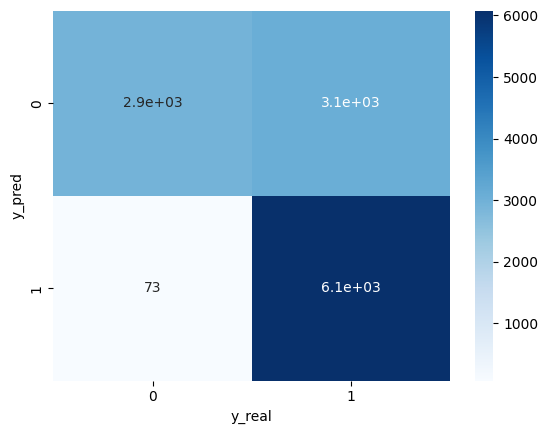

In [ ]:
y_predict = y_pred
y_predict_cat = np.where(y_predict > 0.4, 1, 0)

ds_validacion = pd.DataFrame(y_predict_cat, y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla = pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues')
plt.show()

###### Metricas de la red

In [ ]:
modelo_4 = KerasClassifier(build_fn=create_model4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-33-afdb08dcf0b2>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelo_4 = KerasClassifier(build_fn=create_model4)


In [ ]:
model_metrics = modelo_4.fit(x_train_scaled, y_train,
                                                epochs = 64,
                                                batch_size = 16, verbose=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.96      0.60      0.74     24135
           1       0.72      0.98      0.83     24582

    accuracy                           0.79     48717
   macro avg       0.84      0.79      0.78     48717
weighted avg       0.84      0.79      0.78     48717

F1-Score: 0.8257842715943274


Text(50.722222222222214, 0.5, 'True')

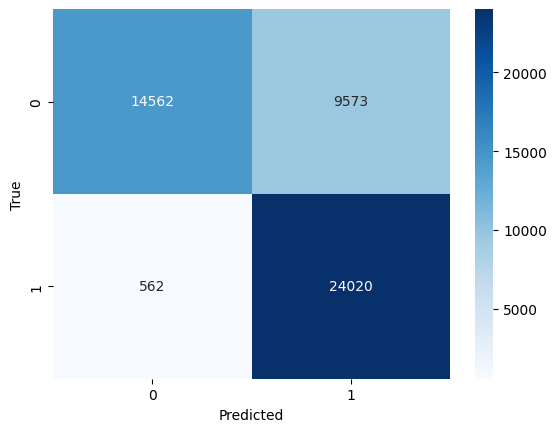

In [ ]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score

#Hago predicción sobre el set de evaluacion
y_pred = modelo_4.predict(x_train_scaled, verbose=False)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_train,y_pred))
print('F1-Score: {}'.format(f1_score(y_train, y_pred, average='binary'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(y_train,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

accuracy = accuracy_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.7919617382022702
Recall: 0.9771377430640306
F1 Score: 0.8257842715943274
Precision: 0.715029916946983


*   Accuracy : 0.7919617382022702

La precisión es una medida que evalúa cuántas de las predicciones del modelo fueron correctas en relación con el total de predicciones realizadas. En este caso, el modelo alcanzó una precisión del 79.19%.

*   Recall : 0.9771377430640306

Recall mide la capacidad del modelo para identificar correctamente todos los casos positivos en el conjunto de datos. Esto significa que el 97.71% de todos los casos positivos presentes en el conjunto de datos fueron identificados correctamente por el modelo.


*  F1 Score: 0.8257842715943274

El F1 Score es una métrica que combina accuracy y recall en una sola puntuación. Es útil cuando se busca un equilibrio entre la capacidad del modelo para predecir correctamente las clases positivas y negativas. En este caso, el F1 Score es de 0.8257842715943274, lo que indica un excelente equilibrio entre accuracy y recall.

*  Precision (Precisión): 0.715029916946983

La precisión se centra en cuántas de las predicciones positivas del modelo son realmente correctas. Un valor de 0.715029916946983 significa que el 71.50% de las predicciones positivas realizadas por el modelo son verdaderas.


###### Predicción sobre el dataset de test

In [ ]:
predict = best_grid.predict(ds_test_prediccion)

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

 66/830 [=>............................] - ETA: 1s

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


830/830 [==============================] - 2s 2ms/step


1    20065
0     6470
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,1
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,1
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_redneuronal6.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap

##### Segunda Optimizacion de hiperparametros

In [ ]:
def create_model4():
    modelo = keras.Sequential([
        keras.layers.Dense(128, input_shape=(d_in,), activation='relu', kernel_initializer='uniform'),

        keras.layers.Dense(64, input_shape=(d_in,), activation='relu', kernel_initializer='uniform'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(cant_clases, activation='softmax')
    ])

    modelo.compile(
        optimizer=keras.optimizers.SGD(learning_rate = 0.001),
        loss='categorical_crossentropy',
        metrics=["accuracy"]
    )

    return modelo

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
modelo_4 = KerasClassifier(build_fn=create_model4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-40-afdb08dcf0b2>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelo_4 = KerasClassifier(build_fn=create_model4)


###### Validación cruzada

Optimizamos los hiperparámetros con Grid Search CV

In [ ]:
param_grid = {
  'epochs': [64, 128, 256],
  'batch_size': [8, 16, 32]
}
print(param_grid)

grid = GridSearchCV(estimator = modelo_4, param_grid = param_grid, cv = 2)
grid_result = grid.fit(x_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


{'epochs': [64, 128, 256], 'batch_size': [8, 16, 32]}
Epoch 1/64
3045/3045 [==============================] - 18s 5ms/step - loss: 0.6931 - accuracy: 0.5066
Epoch 2/64
3045/3045 [==============================] - 10s 3ms/step - loss: 0.6917 - accuracy: 0.5223
Epoch 3/64
3045/3045 [==============================] - 8s 3ms/step - loss: 0.6877 - accuracy: 0.5551
Epoch 4/64
3045/3045 [==============================] - 10s 3ms/step - loss: 0.6738 - accuracy: 0.6134
Epoch 5/64
3045/3045 [==============================] - 7s 2ms/step - loss: 0.6326 - accuracy: 0.6757
Epoch 6/64
3045/3045 [==============================] - 11s 4ms/step - loss: 0.5744 - accuracy: 0.7147
Epoch 7/64
3045/3045 [==============================] - 7s 2ms/step - loss: 0.5393 - accuracy: 0.7327
Epoch 8/64
3045/3045 [==============================] - 10s 3ms/step - loss: 0.5250 - accuracy: 0.7398
Epoch 9/64
3045/3045 [==============================] - 7s 2ms/step - loss: 0.5121 - accuracy: 0.7482
Epoch 10/64
3045/3045 [

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/64
3045/3045 [==============================] - 9s 3ms/step - loss: 0.6930 - accuracy: 0.5123
Epoch 2/64
3045/3045 [==============================] - 10s 3ms/step - loss: 0.6916 - accuracy: 0.5324
Epoch 3/64
3045/3045 [==============================] - 8s 2ms/step - loss: 0.6865 - accuracy: 0.5670
Epoch 4/64
3045/3045 [==============================] - 10s 3ms/step - loss: 0.6762 - accuracy: 0.6141
Epoch 5/64
3045/3045 [==============================] - 10s 3ms/step - loss: 0.6573 - accuracy: 0.6463
Epoch 6/64
3045/3045 [==============================] - 12s 4ms/step - loss: 0.6301 - accuracy: 0.6783
Epoch 7/64
3045/3045 [==============================] - 7s 2ms/step - loss: 0.6066 - accuracy: 0.7011
Epoch 8/64
3045/3045 [==============================] - 11s 4ms/step - loss: 0.5886 - accuracy: 0.7083
Epoch 9/64
3045/3045 [==============================] - 7s 2ms/step - loss: 0.5745 - accuracy: 0.7219
Epoch 10/64
3045/3045 [==============================] - 10s 3ms/step - loss:

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/128
3045/3045 [==============================] - 9s 2ms/step - loss: 0.6927 - accuracy: 0.5090
Epoch 2/128
3045/3045 [==============================] - 9s 3ms/step - loss: 0.6876 - accuracy: 0.5673
Epoch 3/128
3045/3045 [==============================] - 8s 3ms/step - loss: 0.6695 - accuracy: 0.6372
Epoch 4/128
3045/3045 [==============================] - 11s 4ms/step - loss: 0.6271 - accuracy: 0.6875
Epoch 5/128
3045/3045 [==============================] - 10s 3ms/step - loss: 0.5770 - accuracy: 0.7151
Epoch 6/128
3045/3045 [==============================] - 7s 2ms/step - loss: 0.5448 - accuracy: 0.7266
Epoch 7/128
3045/3045 [==============================] - 10s 3ms/step - loss: 0.5272 - accuracy: 0.7389
Epoch 8/128
3045/3045 [==============================] - 7s 2ms/step - loss: 0.5181 - accuracy: 0.7414
Epoch 9/128
3045/3045 [==============================] - 11s 3ms/step - loss: 0.5071 - accuracy: 0.7508
Epoch 10/128
3045/3045 [==============================] - 7s 2ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/128
3045/3045 [==============================] - 11s 3ms/step - loss: 0.6916 - accuracy: 0.5283
Epoch 2/128
3045/3045 [==============================] - 11s 4ms/step - loss: 0.6847 - accuracy: 0.5867
Epoch 3/128
3045/3045 [==============================] - 11s 4ms/step - loss: 0.6690 - accuracy: 0.6248
Epoch 4/128
3045/3045 [==============================] - 11s 4ms/step - loss: 0.6395 - accuracy: 0.6690
Epoch 5/128
3045/3045 [==============================] - 7s 2ms/step - loss: 0.6109 - accuracy: 0.6955
Epoch 6/128
3045/3045 [==============================] - 11s 3ms/step - loss: 0.5899 - accuracy: 0.7040
Epoch 7/128
3045/3045 [==============================] - 7s 2ms/step - loss: 0.5721 - accuracy: 0.7172
Epoch 8/128
3045/3045 [==============================] - 10s 3ms/step - loss: 0.5568 - accuracy: 0.7252
Epoch 9/128
3045/3045 [==============================] - 8s 2ms/step - loss: 0.5400 - accuracy: 0.7378
Epoch 10/128
3045/3045 [==============================] - 11s 4ms/s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/256
3045/3045 [==============================] - 10s 3ms/step - loss: 0.6923 - accuracy: 0.5074
Epoch 2/256
3045/3045 [==============================] - 9s 3ms/step - loss: 0.6860 - accuracy: 0.5679
Epoch 3/256
3045/3045 [==============================] - 9s 3ms/step - loss: 0.6643 - accuracy: 0.6399
Epoch 4/256
3045/3045 [==============================] - 9s 3ms/step - loss: 0.6109 - accuracy: 0.6976
Epoch 5/256
3045/3045 [==============================] - 10s 3ms/step - loss: 0.5605 - accuracy: 0.7222
Epoch 6/256
3045/3045 [==============================] - 9s 3ms/step - loss: 0.5303 - accuracy: 0.7373
Epoch 7/256
3045/3045 [==============================] - 9s 3ms/step - loss: 0.5155 - accuracy: 0.7453
Epoch 8/256
3045/3045 [==============================] - 9s 3ms/step - loss: 0.5082 - accuracy: 0.7471
Epoch 9/256
3045/3045 [==============================] - 9s 3ms/step - loss: 0.4983 - accuracy: 0.7534
Epoch 10/256
3045/3045 [==============================] - 9s 3ms/step -

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/256
3045/3045 [==============================] - 13s 4ms/step - loss: 0.6906 - accuracy: 0.5385
Epoch 2/256
3045/3045 [==============================] - 10s 3ms/step - loss: 0.6799 - accuracy: 0.6099
Epoch 3/256
3045/3045 [==============================] - 10s 3ms/step - loss: 0.6501 - accuracy: 0.6606
Epoch 4/256
3045/3045 [==============================] - 8s 3ms/step - loss: 0.6124 - accuracy: 0.6941
Epoch 5/256
3045/3045 [==============================] - 11s 3ms/step - loss: 0.5864 - accuracy: 0.7105
Epoch 6/256
3045/3045 [==============================] - 8s 3ms/step - loss: 0.5655 - accuracy: 0.7199
Epoch 7/256
3045/3045 [==============================] - 10s 3ms/step - loss: 0.5528 - accuracy: 0.7300
Epoch 8/256
3045/3045 [==============================] - 8s 3ms/step - loss: 0.5363 - accuracy: 0.7407
Epoch 9/256
3045/3045 [==============================] - 11s 4ms/step - loss: 0.5229 - accuracy: 0.7513
Epoch 10/256
3045/3045 [==============================] - 8s 2ms/st

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


1523/1523 [==============================] - 4s 2ms/step - loss: 0.6928 - accuracy: 0.5173
Epoch 2/64
1523/1523 [==============================] - 4s 2ms/step - loss: 0.6921 - accuracy: 0.5429
Epoch 3/64
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6912 - accuracy: 0.5499
Epoch 4/64
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6893 - accuracy: 0.5672
Epoch 5/64
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6872 - accuracy: 0.5856
Epoch 6/64
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6841 - accuracy: 0.6013
Epoch 7/64
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6793 - accuracy: 0.6154
Epoch 8/64
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6719 - accuracy: 0.6388
Epoch 9/64
1523/1523 [==============================] - 4s 2ms/step - loss: 0.6610 - accuracy: 0.6615
Epoch 10/64
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6442 - accurac

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/64
1523/1523 [==============================] - 5s 2ms/step - loss: 0.6926 - accuracy: 0.5123
Epoch 2/64
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6913 - accuracy: 0.5231
Epoch 3/64
1523/1523 [==============================] - 6s 4ms/step - loss: 0.6900 - accuracy: 0.5250
Epoch 4/64
1523/1523 [==============================] - 6s 4ms/step - loss: 0.6871 - accuracy: 0.5421
Epoch 5/64
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6828 - accuracy: 0.5615
Epoch 6/64
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6761 - accuracy: 0.5724
Epoch 7/64
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6674 - accuracy: 0.5952
Epoch 8/64
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6536 - accuracy: 0.6167
Epoch 9/64
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6364 - accuracy: 0.6484
Epoch 10/64
1523/1523 [==============================] - 4s 2ms/step - loss: 0.615

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/128
1523/1523 [==============================] - 5s 2ms/step - loss: 0.6930 - accuracy: 0.5129
Epoch 2/128
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6922 - accuracy: 0.5251
Epoch 3/128
1523/1523 [==============================] - 4s 2ms/step - loss: 0.6914 - accuracy: 0.5399
Epoch 4/128
1523/1523 [==============================] - 6s 4ms/step - loss: 0.6896 - accuracy: 0.5564
Epoch 5/128
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6869 - accuracy: 0.5770
Epoch 6/128
1523/1523 [==============================] - 4s 2ms/step - loss: 0.6835 - accuracy: 0.5896
Epoch 7/128
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6762 - accuracy: 0.6158
Epoch 8/128
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6670 - accuracy: 0.6360
Epoch 9/128
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6564 - accuracy: 0.6497
Epoch 10/128
1523/1523 [==============================] - 4s 2ms/step - l

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


1523/1523 [==============================] - 4s 2ms/step - loss: 0.6934 - accuracy: 0.5039
Epoch 2/128
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6928 - accuracy: 0.5147
Epoch 3/128
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6923 - accuracy: 0.5207
Epoch 4/128
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6916 - accuracy: 0.5289
Epoch 5/128
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6897 - accuracy: 0.5478
Epoch 6/128
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6870 - accuracy: 0.5694
Epoch 7/128
1523/1523 [==============================] - 4s 2ms/step - loss: 0.6841 - accuracy: 0.5792
Epoch 8/128
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6786 - accuracy: 0.5988
Epoch 9/128
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6708 - accuracy: 0.6214
Epoch 10/128
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6619 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


1523/1523 [==============================] - 5s 3ms/step - loss: 0.6933 - accuracy: 0.4996
Epoch 2/256
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6924 - accuracy: 0.5119
Epoch 3/256
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6903 - accuracy: 0.5436
Epoch 4/256
1523/1523 [==============================] - 4s 2ms/step - loss: 0.6863 - accuracy: 0.5654
Epoch 5/256
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6793 - accuracy: 0.5909
Epoch 6/256
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6680 - accuracy: 0.6173
Epoch 7/256
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6539 - accuracy: 0.6362
Epoch 8/256
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6307 - accuracy: 0.6622
Epoch 9/256
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6021 - accuracy: 0.6879
Epoch 10/256
1523/1523 [==============================] - 4s 3ms/step - loss: 0.5766 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/256
1523/1523 [==============================] - 7s 3ms/step - loss: 0.6929 - accuracy: 0.5130
Epoch 2/256
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6917 - accuracy: 0.5320
Epoch 3/256
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6892 - accuracy: 0.5499
Epoch 4/256
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6853 - accuracy: 0.5735
Epoch 5/256
1523/1523 [==============================] - 4s 2ms/step - loss: 0.6799 - accuracy: 0.5950
Epoch 6/256
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6713 - accuracy: 0.6128
Epoch 7/256
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6603 - accuracy: 0.6362
Epoch 8/256
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6458 - accuracy: 0.6541
Epoch 9/256
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6292 - accuracy: 0.6706
Epoch 10/256
1523/1523 [==============================] - 3s 2ms/step - l

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


762/762 [==============================] - 3s 3ms/step - loss: 0.6937 - accuracy: 0.5025
Epoch 2/64
762/762 [==============================] - 3s 4ms/step - loss: 0.6930 - accuracy: 0.5129
Epoch 3/64
762/762 [==============================] - 3s 4ms/step - loss: 0.6926 - accuracy: 0.5152
Epoch 4/64
762/762 [==============================] - 2s 3ms/step - loss: 0.6916 - accuracy: 0.5196
Epoch 5/64
762/762 [==============================] - 2s 2ms/step - loss: 0.6903 - accuracy: 0.5316
Epoch 6/64
762/762 [==============================] - 2s 3ms/step - loss: 0.6891 - accuracy: 0.5408
Epoch 7/64
762/762 [==============================] - 2s 3ms/step - loss: 0.6872 - accuracy: 0.5479
Epoch 8/64
762/762 [==============================] - 2s 2ms/step - loss: 0.6845 - accuracy: 0.5645
Epoch 9/64
762/762 [==============================] - 2s 3ms/step - loss: 0.6828 - accuracy: 0.5644
Epoch 10/64
762/762 [==============================] - 3s 3ms/step - loss: 0.6788 - accuracy: 0.5768
Epoch 11/6

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


762/762 [==============================] - 3s 2ms/step - loss: 0.6930 - accuracy: 0.5073
Epoch 2/64
762/762 [==============================] - 2s 2ms/step - loss: 0.6922 - accuracy: 0.5341
Epoch 3/64
762/762 [==============================] - 2s 3ms/step - loss: 0.6915 - accuracy: 0.5423
Epoch 4/64
762/762 [==============================] - 2s 2ms/step - loss: 0.6904 - accuracy: 0.5535
Epoch 5/64
762/762 [==============================] - 2s 3ms/step - loss: 0.6885 - accuracy: 0.5626
Epoch 6/64
762/762 [==============================] - 3s 3ms/step - loss: 0.6865 - accuracy: 0.5745
Epoch 7/64
762/762 [==============================] - 3s 4ms/step - loss: 0.6842 - accuracy: 0.5911
Epoch 8/64
762/762 [==============================] - 2s 3ms/step - loss: 0.6815 - accuracy: 0.5926
Epoch 9/64
762/762 [==============================] - 2s 2ms/step - loss: 0.6777 - accuracy: 0.6142
Epoch 10/64
762/762 [==============================] - 2s 2ms/step - loss: 0.6730 - accuracy: 0.6209
Epoch 11/6

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/128
762/762 [==============================] - 5s 4ms/step - loss: 0.6932 - accuracy: 0.5028
Epoch 2/128
762/762 [==============================] - 2s 2ms/step - loss: 0.6931 - accuracy: 0.5077
Epoch 3/128
762/762 [==============================] - 2s 2ms/step - loss: 0.6931 - accuracy: 0.5145
Epoch 4/128
762/762 [==============================] - 2s 2ms/step - loss: 0.6930 - accuracy: 0.5150
Epoch 5/128
762/762 [==============================] - 2s 3ms/step - loss: 0.6928 - accuracy: 0.5152
Epoch 6/128
762/762 [==============================] - 3s 3ms/step - loss: 0.6928 - accuracy: 0.5224
Epoch 7/128
762/762 [==============================] - 3s 4ms/step - loss: 0.6926 - accuracy: 0.5272
Epoch 8/128
762/762 [==============================] - 3s 4ms/step - loss: 0.6923 - accuracy: 0.5326
Epoch 9/128
762/762 [==============================] - 2s 3ms/step - loss: 0.6920 - accuracy: 0.5370
Epoch 10/128
762/762 [==============================] - 2s 2ms/step - loss: 0.6916 - accura

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/128
762/762 [==============================] - 3s 3ms/step - loss: 0.6927 - accuracy: 0.5064
Epoch 2/128
762/762 [==============================] - 3s 4ms/step - loss: 0.6919 - accuracy: 0.5127
Epoch 3/128
762/762 [==============================] - 3s 4ms/step - loss: 0.6904 - accuracy: 0.5182
Epoch 4/128
762/762 [==============================] - 3s 3ms/step - loss: 0.6893 - accuracy: 0.5295
Epoch 5/128
762/762 [==============================] - 2s 3ms/step - loss: 0.6872 - accuracy: 0.5461
Epoch 6/128
762/762 [==============================] - 2s 3ms/step - loss: 0.6845 - accuracy: 0.5649
Epoch 7/128
762/762 [==============================] - 2s 3ms/step - loss: 0.6802 - accuracy: 0.5850
Epoch 8/128
762/762 [==============================] - 2s 3ms/step - loss: 0.6737 - accuracy: 0.5982
Epoch 9/128
762/762 [==============================] - 2s 3ms/step - loss: 0.6665 - accuracy: 0.6179
Epoch 10/128
762/762 [==============================] - 3s 3ms/step - loss: 0.6561 - accura

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/256
762/762 [==============================] - 4s 4ms/step - loss: 0.6933 - accuracy: 0.5002
Epoch 2/256
762/762 [==============================] - 3s 3ms/step - loss: 0.6926 - accuracy: 0.5160
Epoch 3/256
762/762 [==============================] - 2s 3ms/step - loss: 0.6921 - accuracy: 0.5289
Epoch 4/256
762/762 [==============================] - 2s 3ms/step - loss: 0.6912 - accuracy: 0.5402
Epoch 5/256
762/762 [==============================] - 2s 3ms/step - loss: 0.6897 - accuracy: 0.5578
Epoch 6/256
762/762 [==============================] - 2s 2ms/step - loss: 0.6892 - accuracy: 0.5639
Epoch 7/256
762/762 [==============================] - 2s 3ms/step - loss: 0.6871 - accuracy: 0.5775
Epoch 8/256
762/762 [==============================] - 3s 3ms/step - loss: 0.6842 - accuracy: 0.5972
Epoch 9/256
762/762 [==============================] - 3s 4ms/step - loss: 0.6816 - accuracy: 0.5991
Epoch 10/256
762/762 [==============================] - 3s 4ms/step - loss: 0.6782 - accura

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


762/762 [==============================] - 4s 4ms/step - loss: 0.6936 - accuracy: 0.5036
Epoch 2/256
762/762 [==============================] - 3s 4ms/step - loss: 0.6934 - accuracy: 0.5036
Epoch 3/256
762/762 [==============================] - 3s 4ms/step - loss: 0.6929 - accuracy: 0.5143
Epoch 4/256
762/762 [==============================] - 2s 3ms/step - loss: 0.6924 - accuracy: 0.5183
Epoch 5/256
762/762 [==============================] - 2s 3ms/step - loss: 0.6924 - accuracy: 0.5169
Epoch 6/256
762/762 [==============================] - 2s 3ms/step - loss: 0.6916 - accuracy: 0.5299
Epoch 7/256
762/762 [==============================] - 2s 3ms/step - loss: 0.6908 - accuracy: 0.5368
Epoch 8/256
762/762 [==============================] - 2s 3ms/step - loss: 0.6900 - accuracy: 0.5416
Epoch 9/256
762/762 [==============================] - 3s 3ms/step - loss: 0.6887 - accuracy: 0.5494
Epoch 10/256
762/762 [==============================] - 3s 3ms/step - loss: 0.6873 - accuracy: 0.5575
E

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/128
1523/1523 [==============================] - 6s 3ms/step - loss: 0.6927 - accuracy: 0.5127
Epoch 2/128
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6920 - accuracy: 0.5334
Epoch 3/128
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6904 - accuracy: 0.5464
Epoch 4/128
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6882 - accuracy: 0.5673
Epoch 5/128
1523/1523 [==============================] - 6s 4ms/step - loss: 0.6844 - accuracy: 0.5862
Epoch 6/128
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6792 - accuracy: 0.6054
Epoch 7/128
1523/1523 [==============================] - 4s 3ms/step - loss: 0.6710 - accuracy: 0.6268
Epoch 8/128
1523/1523 [==============================] - 5s 3ms/step - loss: 0.6604 - accuracy: 0.6450
Epoch 9/128
1523/1523 [==============================] - 6s 4ms/step - loss: 0.6441 - accuracy: 0.6667
Epoch 10/128
1523/1523 [==============================] - 6s 4ms/step - l

In [ ]:
print("Mejor modelo: %f %s" % (grid_result.best_score_, grid_result.best_params_))

Mejor modelo: 0.822506 {'batch_size': 32, 'epochs': 128}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Predicción con mejor estimador
best_grid = grid.best_estimator_

y_pred = best_grid.predict(x_test_scaled)

#Accuracy test
f1_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


381/381 [==============================] - 1s 2ms/step


0.8161774838087364

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


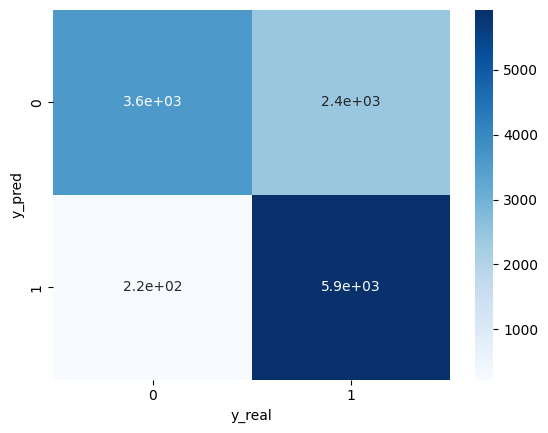

In [ ]:
y_predict = y_pred
y_predict_cat = np.where(y_predict > 0.4, 1, 0)

ds_validacion = pd.DataFrame(y_predict_cat, y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla = pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues')
plt.show()

###### Métricas de la red

In [ ]:
modelo_4 = KerasClassifier(build_fn=create_model4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-18-afdb08dcf0b2>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelo_4 = KerasClassifier(build_fn=create_model4)


In [ ]:
#{'batch_size': 32, 'epochs': 128}
model_metrics = modelo_4.fit(x_train_scaled, y_train,
                                                epochs = 128,
                                                batch_size = 32, verbose=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.77      0.95      0.85     24135
           1       0.93      0.73      0.82     24582

    accuracy                           0.84     48717
   macro avg       0.85      0.84      0.83     48717
weighted avg       0.85      0.84      0.83     48717

F1-Score: 0.8164999314786898


Text(50.722222222222214, 0.5, 'True')

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen 

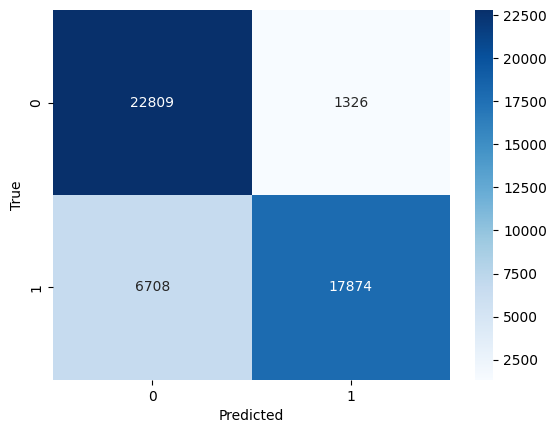

In [ ]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score

#Hago predicción sobre el set de evaluacion
y_pred = modelo_4.predict(x_train_scaled, verbose=False)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_train,y_pred))
print('F1-Score: {}'.format(f1_score(y_train, y_pred, average='binary'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(y_train,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

accuracy = accuracy_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)

Accuracy: 0.8350883675103147
Recall: 0.7271174029777886
F1 Score: 0.8164999314786898
Precision: 0.9309375


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy:
Recall:
F1 Score:
Precision:

*   Accuracy : 0.8350883675103147

La precisión es una medida que evalúa cuántas de las predicciones del modelo fueron correctas en relación con el total de predicciones realizadas. En este caso, el modelo alcanzó una precisión del 83.50%.

*   Recall : 0.7271174029777886

Recall mide la capacidad del modelo para identificar correctamente todos los casos positivos en el conjunto de datos. Esto significa que el 72.71% de todos los casos positivos presentes en el conjunto de datos fueron identificados correctamente por el modelo.


*  F1 Score: 0.8164999314786898

El F1 Score es una métrica que combina accuracy y recall en una sola puntuación. Es útil cuando se busca un equilibrio entre la capacidad del modelo para predecir correctamente las clases positivas y negativas. En este caso, el F1 Score es de 0.8164999314786898, lo que indica un excelente equilibrio entre accuracy y recall.

*  Precision (Precisión): 0.9309375

La precisión se centra en cuántas de las predicciones positivas del modelo son realmente correctas. Un valor de 0.715029916946983 significa que el 93.09% de las predicciones positivas realizadas por el modelo son verdaderas.


###### Predicción sobre el dataset de test

In [ ]:
best_grid = modelo_4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
predict = best_grid.predict(dataset_test_scaled)

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

  1/830 [..............................] - ETA: 36s

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


830/830 [==============================] - 1s 2ms/step


0    16435
1    10100
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,0
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,0
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_redneuronal8.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap

##### Tercera Optimizacion de hiperparametros

In [ ]:
def create_model4():
    modelo = keras.Sequential([
        keras.layers.Dense(128, input_shape=(d_in,), activation='relu', kernel_initializer='uniform'),

        keras.layers.Dense(64, input_shape=(d_in,), activation='relu', kernel_initializer='uniform'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(cant_clases, activation='softmax')
    ])

    modelo.compile(
        optimizer=keras.optimizers.SGD(learning_rate = 0.001),
        loss='categorical_crossentropy',
        metrics=["accuracy"]
    )

    return modelo

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
modelo_4 = KerasClassifier(build_fn=create_model4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-40-afdb08dcf0b2>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelo_4 = KerasClassifier(build_fn=create_model4)


###### Validación cruzada

Optimizamos los hiperparámetros con Grid Search CV

In [ ]:
param_grid = {
  'epochs': [32, 64, 128, 256, 512],
  'batch_size': [4, 8, 16, 32, 64]
}
print(param_grid)

grid = GridSearchCV(estimator = modelo_4, param_grid = param_grid, cv = 2)
grid_result = grid.fit(x_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


{'epochs': [32, 64, 128, 256, 512], 'batch_size': [4, 8, 16, 32, 64]}
Epoch 1/32
6090/6090 [==============================] - 15s 2ms/step - loss: 0.6902 - accuracy: 0.5422
Epoch 2/32
6090/6090 [==============================] - 17s 3ms/step - loss: 0.6698 - accuracy: 0.6245
Epoch 3/32
6090/6090 [==============================] - 10s 2ms/step - loss: 0.6174 - accuracy: 0.6847
Epoch 4/32
6090/6090 [==============================] - 8s 1ms/step - loss: 0.5696 - accuracy: 0.7182
Epoch 5/32
6090/6090 [==============================] - 9s 2ms/step - loss: 0.5403 - accuracy: 0.7347
Epoch 6/32
6090/6090 [==============================] - 9s 1ms/step - loss: 0.5155 - accuracy: 0.7522
Epoch 7/32
6090/6090 [==============================] - 9s 1ms/step - loss: 0.4959 - accuracy: 0.7669
Epoch 8/32
6090/6090 [==============================] - 9s 2ms/step - loss: 0.4798 - accuracy: 0.7777
Epoch 9/32
6090/6090 [==============================] - 8s 1ms/step - loss: 0.4651 - accuracy: 0.7862
Epoch 10/

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


6090/6090 [==============================] - 10s 1ms/step - loss: 0.6906 - accuracy: 0.5378
Epoch 2/32
6090/6090 [==============================] - 9s 2ms/step - loss: 0.6646 - accuracy: 0.6395
Epoch 3/32
6090/6090 [==============================] - 8s 1ms/step - loss: 0.5986 - accuracy: 0.7039
Epoch 4/32
6090/6090 [==============================] - 9s 2ms/step - loss: 0.5601 - accuracy: 0.7255
Epoch 5/32
6090/6090 [==============================] - 8s 1ms/step - loss: 0.5322 - accuracy: 0.7405
Epoch 6/32
6090/6090 [==============================] - 9s 1ms/step - loss: 0.5107 - accuracy: 0.7552
Epoch 7/32
6090/6090 [==============================] - 9s 2ms/step - loss: 0.4941 - accuracy: 0.7708
Epoch 8/32
6090/6090 [==============================] - 8s 1ms/step - loss: 0.4852 - accuracy: 0.7738
Epoch 9/32
6090/6090 [==============================] - 9s 2ms/step - loss: 0.4729 - accuracy: 0.7787
Epoch 10/32
6090/6090 [==============================] - 9s 1ms/step - loss: 0.4654 - accura

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


6090/6090 [==============================] - 9s 1ms/step - loss: 0.6908 - accuracy: 0.5406
Epoch 2/64
6090/6090 [==============================] - 11s 2ms/step - loss: 0.6694 - accuracy: 0.6321
Epoch 3/64
6090/6090 [==============================] - 9s 1ms/step - loss: 0.6136 - accuracy: 0.6951
Epoch 4/64
6090/6090 [==============================] - 8s 1ms/step - loss: 0.5729 - accuracy: 0.7165
Epoch 5/64
6090/6090 [==============================] - 9s 2ms/step - loss: 0.5482 - accuracy: 0.7313
Epoch 6/64
6090/6090 [==============================] - 8s 1ms/step - loss: 0.5185 - accuracy: 0.7517
Epoch 7/64
6090/6090 [==============================] - 9s 2ms/step - loss: 0.4975 - accuracy: 0.7645
Epoch 8/64
6090/6090 [==============================] - 9s 1ms/step - loss: 0.4880 - accuracy: 0.7724
Epoch 9/64
6090/6090 [==============================] - 9s 1ms/step - loss: 0.4728 - accuracy: 0.7795
Epoch 10/64
6090/6090 [==============================] - 9s 2ms/step - loss: 0.4636 - accura

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


6090/6090 [==============================] - 9s 1ms/step - loss: 0.6928 - accuracy: 0.5153
Epoch 2/64
6090/6090 [==============================] - 9s 1ms/step - loss: 0.6857 - accuracy: 0.5907
Epoch 3/64
6090/6090 [==============================] - 9s 2ms/step - loss: 0.6578 - accuracy: 0.6549
Epoch 4/64
6090/6090 [==============================] - 8s 1ms/step - loss: 0.6008 - accuracy: 0.7067
Epoch 5/64
6090/6090 [==============================] - 10s 2ms/step - loss: 0.5675 - accuracy: 0.7225
Epoch 6/64
6090/6090 [==============================] - 8s 1ms/step - loss: 0.5405 - accuracy: 0.7376
Epoch 7/64
6090/6090 [==============================] - 9s 1ms/step - loss: 0.5195 - accuracy: 0.7540
Epoch 8/64
6090/6090 [==============================] - 9s 1ms/step - loss: 0.5010 - accuracy: 0.7643
Epoch 9/64
6090/6090 [==============================] - 9s 1ms/step - loss: 0.4866 - accuracy: 0.7745
Epoch 10/64
6090/6090 [==============================] - 13s 2ms/step - loss: 0.4781 - accur

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


6090/6090 [==============================] - 31s 2ms/step - loss: 0.6867 - accuracy: 0.5682
Epoch 2/128
6090/6090 [==============================] - 9s 1ms/step - loss: 0.6397 - accuracy: 0.6710
Epoch 3/128
6090/6090 [==============================] - 9s 2ms/step - loss: 0.5906 - accuracy: 0.7004
Epoch 4/128
6090/6090 [==============================] - 10s 2ms/step - loss: 0.5608 - accuracy: 0.7212
Epoch 5/128
6090/6090 [==============================] - 8s 1ms/step - loss: 0.5338 - accuracy: 0.7391
Epoch 6/128
6090/6090 [==============================] - 10s 2ms/step - loss: 0.5128 - accuracy: 0.7564
Epoch 7/128
6090/6090 [==============================] - 10s 2ms/step - loss: 0.5031 - accuracy: 0.7649
Epoch 8/128
6090/6090 [==============================] - 8s 1ms/step - loss: 0.4867 - accuracy: 0.7717
Epoch 9/128
6090/6090 [==============================] - 9s 2ms/step - loss: 0.4736 - accuracy: 0.7800
Epoch 10/128
6090/6090 [==============================] - 8s 1ms/step - loss: 0.4

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


6090/6090 [==============================] - 10s 2ms/step - loss: 0.6915 - accuracy: 0.5283
Epoch 2/128
6090/6090 [==============================] - 9s 1ms/step - loss: 0.6733 - accuracy: 0.6177
Epoch 3/128
6090/6090 [==============================] - 9s 1ms/step - loss: 0.6301 - accuracy: 0.6745
Epoch 4/128
6090/6090 [==============================] - 9s 2ms/step - loss: 0.5937 - accuracy: 0.7025
Epoch 5/128
6090/6090 [==============================] - 8s 1ms/step - loss: 0.5674 - accuracy: 0.7243
Epoch 6/128
6090/6090 [==============================] - 9s 2ms/step - loss: 0.5443 - accuracy: 0.7380
Epoch 7/128
6090/6090 [==============================] - 9s 1ms/step - loss: 0.5209 - accuracy: 0.7529
Epoch 8/128
6090/6090 [==============================] - 9s 1ms/step - loss: 0.5079 - accuracy: 0.7628
Epoch 9/128
6090/6090 [==============================] - 9s 2ms/step - loss: 0.4906 - accuracy: 0.7747
Epoch 10/128
6090/6090 [==============================] - 8s 1ms/step - loss: 0.4796

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


6090/6090 [==============================] - 9s 1ms/step - loss: 0.6929 - accuracy: 0.5123
Epoch 2/256
6090/6090 [==============================] - 9s 2ms/step - loss: 0.6903 - accuracy: 0.5392
Epoch 3/256
6090/6090 [==============================] - 9s 1ms/step - loss: 0.6829 - accuracy: 0.5727
Epoch 4/256
6090/6090 [==============================] - 9s 1ms/step - loss: 0.6639 - accuracy: 0.6131
Epoch 5/256
6090/6090 [==============================] - 9s 2ms/step - loss: 0.6272 - accuracy: 0.6634
Epoch 6/256
6090/6090 [==============================] - 8s 1ms/step - loss: 0.5886 - accuracy: 0.6951
Epoch 7/256
6090/6090 [==============================] - 9s 2ms/step - loss: 0.5544 - accuracy: 0.7163
Epoch 8/256
6090/6090 [==============================] - 8s 1ms/step - loss: 0.5247 - accuracy: 0.7360
Epoch 9/256
6090/6090 [==============================] - 9s 1ms/step - loss: 0.4972 - accuracy: 0.7539
Epoch 10/256
6090/6090 [==============================] - 10s 2ms/step - loss: 0.4785

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


6090/6090 [==============================] - 9s 1ms/step - loss: 0.6925 - accuracy: 0.5211
Epoch 2/256
6090/6090 [==============================] - 9s 2ms/step - loss: 0.6885 - accuracy: 0.5547
Epoch 3/256
6090/6090 [==============================] - 9s 1ms/step - loss: 0.6729 - accuracy: 0.6105
Epoch 4/256
6090/6090 [==============================] - 9s 1ms/step - loss: 0.6282 - accuracy: 0.6765
Epoch 5/256
6090/6090 [==============================] - 9s 2ms/step - loss: 0.5908 - accuracy: 0.7021
Epoch 6/256
6090/6090 [==============================] - 8s 1ms/step - loss: 0.5645 - accuracy: 0.7248
Epoch 7/256
6090/6090 [==============================] - 9s 2ms/step - loss: 0.5436 - accuracy: 0.7375
Epoch 8/256
6090/6090 [==============================] - 8s 1ms/step - loss: 0.5244 - accuracy: 0.7474
Epoch 9/256
6090/6090 [==============================] - 9s 2ms/step - loss: 0.5065 - accuracy: 0.7629
Epoch 10/256
6090/6090 [==============================] - 9s 2ms/step - loss: 0.4947 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


6090/6090 [==============================] - 10s 1ms/step - loss: 0.6892 - accuracy: 0.5404
Epoch 2/512
6090/6090 [==============================] - 10s 2ms/step - loss: 0.6638 - accuracy: 0.6205
Epoch 3/512
6090/6090 [==============================] - 8s 1ms/step - loss: 0.6150 - accuracy: 0.6844
Epoch 4/512
6090/6090 [==============================] - 10s 2ms/step - loss: 0.5729 - accuracy: 0.7121
Epoch 5/512
6090/6090 [==============================] - 9s 2ms/step - loss: 0.5407 - accuracy: 0.7334
Epoch 6/512
6090/6090 [==============================] - 11s 2ms/step - loss: 0.5172 - accuracy: 0.7508
Epoch 7/512
6090/6090 [==============================] - 9s 2ms/step - loss: 0.4916 - accuracy: 0.7670
Epoch 8/512
6090/6090 [==============================] - 9s 1ms/step - loss: 0.4758 - accuracy: 0.7817
Epoch 9/512
6090/6090 [==============================] - 10s 2ms/step - loss: 0.4595 - accuracy: 0.7829
Epoch 10/512
6090/6090 [==============================] - 8s 1ms/step - loss: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


6090/6090 [==============================] - 9s 1ms/step - loss: 0.6872 - accuracy: 0.5510
Epoch 2/512
6090/6090 [==============================] - 10s 2ms/step - loss: 0.6143 - accuracy: 0.6972
Epoch 3/512
6090/6090 [==============================] - 9s 1ms/step - loss: 0.5286 - accuracy: 0.7383
Epoch 4/512
6090/6090 [==============================] - 9s 1ms/step - loss: 0.5029 - accuracy: 0.7543
Epoch 5/512
6090/6090 [==============================] - 10s 2ms/step - loss: 0.4932 - accuracy: 0.7605
Epoch 6/512
6090/6090 [==============================] - 8s 1ms/step - loss: 0.4787 - accuracy: 0.7680
Epoch 7/512
6090/6090 [==============================] - 10s 2ms/step - loss: 0.4716 - accuracy: 0.7691
Epoch 8/512
6090/6090 [==============================] - 9s 1ms/step - loss: 0.4608 - accuracy: 0.7758
Epoch 9/512
6090/6090 [==============================] - 9s 2ms/step - loss: 0.4559 - accuracy: 0.7822
Epoch 10/512
6090/6090 [==============================] - 10s 2ms/step - loss: 0.4

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/32
3045/3045 [==============================] - 5s 2ms/step - loss: 0.6916 - accuracy: 0.5127
Epoch 2/32
3045/3045 [==============================] - 5s 2ms/step - loss: 0.6856 - accuracy: 0.5681
Epoch 3/32
3045/3045 [==============================] - 4s 1ms/step - loss: 0.6650 - accuracy: 0.6329
Epoch 4/32
3045/3045 [==============================] - 4s 1ms/step - loss: 0.6192 - accuracy: 0.6847
Epoch 5/32
3045/3045 [==============================] - 6s 2ms/step - loss: 0.5669 - accuracy: 0.7173
Epoch 6/32
3045/3045 [==============================] - 4s 1ms/step - loss: 0.5437 - accuracy: 0.7296
Epoch 7/32
3045/3045 [==============================] - 4s 1ms/step - loss: 0.5221 - accuracy: 0.7419
Epoch 8/32
3045/3045 [==============================] - 5s 2ms/step - loss: 0.5111 - accuracy: 0.7482
Epoch 9/32
3045/3045 [==============================] - 5s 2ms/step - loss: 0.4973 - accuracy: 0.7599
Epoch 10/32
3045/3045 [==============================] - 4s 1ms/step - loss: 0.490

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


3045/3045 [==============================] - 5s 2ms/step - loss: 0.6899 - accuracy: 0.5319
Epoch 2/32
3045/3045 [==============================] - 5s 2ms/step - loss: 0.6755 - accuracy: 0.6047
Epoch 3/32
3045/3045 [==============================] - 4s 1ms/step - loss: 0.6265 - accuracy: 0.6757
Epoch 4/32
3045/3045 [==============================] - 4s 1ms/step - loss: 0.5607 - accuracy: 0.7230
Epoch 5/32
3045/3045 [==============================] - 6s 2ms/step - loss: 0.5268 - accuracy: 0.7392
Epoch 6/32
3045/3045 [==============================] - 4s 1ms/step - loss: 0.5122 - accuracy: 0.7440
Epoch 7/32
3045/3045 [==============================] - 4s 1ms/step - loss: 0.5043 - accuracy: 0.7518
Epoch 8/32
3045/3045 [==============================] - 6s 2ms/step - loss: 0.4950 - accuracy: 0.7583
Epoch 9/32
3045/3045 [==============================] - 5s 1ms/step - loss: 0.4870 - accuracy: 0.7624
Epoch 10/32
3045/3045 [==============================] - 4s 1ms/step - loss: 0.4801 - accurac

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


3045/3045 [==============================] - 5s 1ms/step - loss: 0.6924 - accuracy: 0.5176
Epoch 2/64
3045/3045 [==============================] - 6s 2ms/step - loss: 0.6889 - accuracy: 0.5669
Epoch 3/64
3045/3045 [==============================] - 4s 1ms/step - loss: 0.6790 - accuracy: 0.6092
Epoch 4/64
3045/3045 [==============================] - 4s 1ms/step - loss: 0.6590 - accuracy: 0.6427
Epoch 5/64
3045/3045 [==============================] - 5s 2ms/step - loss: 0.6287 - accuracy: 0.6791
Epoch 6/64
3045/3045 [==============================] - 5s 2ms/step - loss: 0.6002 - accuracy: 0.7003
Epoch 7/64
3045/3045 [==============================] - 4s 1ms/step - loss: 0.5844 - accuracy: 0.7067
Epoch 8/64
3045/3045 [==============================] - 5s 2ms/step - loss: 0.5616 - accuracy: 0.7272
Epoch 9/64
3045/3045 [==============================] - 7s 2ms/step - loss: 0.5492 - accuracy: 0.7313
Epoch 10/64
3045/3045 [==============================] - 5s 2ms/step - loss: 0.5338 - accurac

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


3045/3045 [==============================] - 5s 1ms/step - loss: 0.6907 - accuracy: 0.5200
Epoch 2/64
3045/3045 [==============================] - 4s 1ms/step - loss: 0.6733 - accuracy: 0.6123
Epoch 3/64
3045/3045 [==============================] - 6s 2ms/step - loss: 0.6251 - accuracy: 0.6786
Epoch 4/64
3045/3045 [==============================] - 5s 2ms/step - loss: 0.5660 - accuracy: 0.7197
Epoch 5/64
3045/3045 [==============================] - 4s 1ms/step - loss: 0.5315 - accuracy: 0.7387
Epoch 6/64
3045/3045 [==============================] - 5s 2ms/step - loss: 0.5131 - accuracy: 0.7500
Epoch 7/64
3045/3045 [==============================] - 5s 2ms/step - loss: 0.5029 - accuracy: 0.7510
Epoch 8/64
3045/3045 [==============================] - 4s 1ms/step - loss: 0.4918 - accuracy: 0.7605
Epoch 9/64
3045/3045 [==============================] - 5s 2ms/step - loss: 0.4827 - accuracy: 0.7660
Epoch 10/64
3045/3045 [==============================] - 5s 2ms/step - loss: 0.4746 - accurac

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


3045/3045 [==============================] - 6s 2ms/step - loss: 0.6929 - accuracy: 0.5063
Epoch 2/128
3045/3045 [==============================] - 4s 1ms/step - loss: 0.6918 - accuracy: 0.5248
Epoch 3/128
3045/3045 [==============================] - 4s 1ms/step - loss: 0.6885 - accuracy: 0.5473
Epoch 4/128
3045/3045 [==============================] - 6s 2ms/step - loss: 0.6823 - accuracy: 0.5728
Epoch 5/128
3045/3045 [==============================] - 4s 1ms/step - loss: 0.6679 - accuracy: 0.6112
Epoch 6/128
3045/3045 [==============================] - 4s 1ms/step - loss: 0.6425 - accuracy: 0.6544
Epoch 7/128
3045/3045 [==============================] - 5s 2ms/step - loss: 0.6141 - accuracy: 0.6834
Epoch 8/128
3045/3045 [==============================] - 5s 2ms/step - loss: 0.5914 - accuracy: 0.7010
Epoch 9/128
3045/3045 [==============================] - 4s 1ms/step - loss: 0.5742 - accuracy: 0.7159
Epoch 10/128
3045/3045 [==============================] - 6s 2ms/step - loss: 0.5589 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/128
3045/3045 [==============================] - 7s 1ms/step - loss: 0.6935 - accuracy: 0.5014
Epoch 2/128
3045/3045 [==============================] - 5s 2ms/step - loss: 0.6917 - accuracy: 0.5250
Epoch 3/128
3045/3045 [==============================] - 6s 2ms/step - loss: 0.6890 - accuracy: 0.5402
Epoch 4/128
3045/3045 [==============================] - 5s 2ms/step - loss: 0.6837 - accuracy: 0.5684
Epoch 5/128
3045/3045 [==============================] - 5s 2ms/step - loss: 0.6727 - accuracy: 0.5995
Epoch 6/128
3045/3045 [==============================] - 6s 2ms/step - loss: 0.6451 - accuracy: 0.6467
Epoch 7/128
3045/3045 [==============================] - 5s 1ms/step - loss: 0.5914 - accuracy: 0.7029
Epoch 8/128
3045/3045 [==============================] - 4s 1ms/step - loss: 0.5506 - accuracy: 0.7284
Epoch 9/128
3045/3045 [==============================] - 6s 2ms/step - loss: 0.5277 - accuracy: 0.7365
Epoch 10/128
3045/3045 [==============================] - 7s 2ms/step - l

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


3045/3045 [==============================] - 6s 2ms/step - loss: 0.6928 - accuracy: 0.5062
Epoch 2/256
3045/3045 [==============================] - 4s 1ms/step - loss: 0.6906 - accuracy: 0.5359
Epoch 3/256
3045/3045 [==============================] - 5s 2ms/step - loss: 0.6830 - accuracy: 0.5970
Epoch 4/256
3045/3045 [==============================] - 5s 2ms/step - loss: 0.6615 - accuracy: 0.6449
Epoch 5/256
3045/3045 [==============================] - 5s 1ms/step - loss: 0.6107 - accuracy: 0.6970
Epoch 6/256
3045/3045 [==============================] - 5s 2ms/step - loss: 0.5611 - accuracy: 0.7239
Epoch 7/256
3045/3045 [==============================] - 5s 2ms/step - loss: 0.5340 - accuracy: 0.7372
Epoch 8/256
3045/3045 [==============================] - 4s 1ms/step - loss: 0.5209 - accuracy: 0.7424
Epoch 9/256
3045/3045 [==============================] - 5s 2ms/step - loss: 0.5058 - accuracy: 0.7505
Epoch 10/256
3045/3045 [==============================] - 6s 2ms/step - loss: 0.4949 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


3045/3045 [==============================] - 6s 2ms/step - loss: 0.6918 - accuracy: 0.5233
Epoch 2/256
3045/3045 [==============================] - 5s 1ms/step - loss: 0.6884 - accuracy: 0.5637
Epoch 3/256
3045/3045 [==============================] - 4s 1ms/step - loss: 0.6772 - accuracy: 0.6100
Epoch 4/256
3045/3045 [==============================] - 6s 2ms/step - loss: 0.6504 - accuracy: 0.6647
Epoch 5/256
3045/3045 [==============================] - 4s 1ms/step - loss: 0.6161 - accuracy: 0.6952
Epoch 6/256
3045/3045 [==============================] - 4s 1ms/step - loss: 0.5926 - accuracy: 0.7074
Epoch 7/256
3045/3045 [==============================] - 5s 2ms/step - loss: 0.5746 - accuracy: 0.7128
Epoch 8/256
3045/3045 [==============================] - 5s 2ms/step - loss: 0.5558 - accuracy: 0.7258
Epoch 9/256
3045/3045 [==============================] - 4s 1ms/step - loss: 0.5436 - accuracy: 0.7374
Epoch 10/256
3045/3045 [==============================] - 5s 2ms/step - loss: 0.5322 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


3045/3045 [==============================] - 6s 2ms/step - loss: 0.6929 - accuracy: 0.5121
Epoch 2/512
3045/3045 [==============================] - 5s 1ms/step - loss: 0.6927 - accuracy: 0.5215
Epoch 3/512
3045/3045 [==============================] - 5s 2ms/step - loss: 0.6911 - accuracy: 0.5505
Epoch 4/512
3045/3045 [==============================] - 5s 2ms/step - loss: 0.6873 - accuracy: 0.5824
Epoch 5/512
3045/3045 [==============================] - 4s 1ms/step - loss: 0.6816 - accuracy: 0.6099
Epoch 6/512
3045/3045 [==============================] - 5s 2ms/step - loss: 0.6686 - accuracy: 0.6425
Epoch 7/512
3045/3045 [==============================] - 5s 2ms/step - loss: 0.6451 - accuracy: 0.6722
Epoch 8/512
3045/3045 [==============================] - 4s 1ms/step - loss: 0.6154 - accuracy: 0.6926
Epoch 9/512
3045/3045 [==============================] - 5s 2ms/step - loss: 0.5941 - accuracy: 0.7067
Epoch 10/512
3045/3045 [==============================] - 6s 2ms/step - loss: 0.5781 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


3045/3045 [==============================] - 7s 2ms/step - loss: 0.6919 - accuracy: 0.5218
Epoch 2/512
3045/3045 [==============================] - 6s 2ms/step - loss: 0.6871 - accuracy: 0.5494
Epoch 3/512
3045/3045 [==============================] - 5s 2ms/step - loss: 0.6764 - accuracy: 0.5810
Epoch 4/512
3045/3045 [==============================] - 5s 2ms/step - loss: 0.6508 - accuracy: 0.6233
Epoch 5/512
3045/3045 [==============================] - 5s 2ms/step - loss: 0.6025 - accuracy: 0.6812
Epoch 6/512
3045/3045 [==============================] - 5s 2ms/step - loss: 0.5541 - accuracy: 0.7236
Epoch 7/512
3045/3045 [==============================] - 5s 2ms/step - loss: 0.5281 - accuracy: 0.7405
Epoch 8/512
3045/3045 [==============================] - 5s 2ms/step - loss: 0.5124 - accuracy: 0.7515
Epoch 9/512
3045/3045 [==============================] - 4s 1ms/step - loss: 0.5008 - accuracy: 0.7587
Epoch 10/512
3045/3045 [==============================] - 5s 2ms/step - loss: 0.4915 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


1523/1523 [==============================] - 3s 1ms/step - loss: 0.6933 - accuracy: 0.4999
Epoch 2/32
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6930 - accuracy: 0.5154
Epoch 3/32
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6928 - accuracy: 0.5234
Epoch 4/32
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6921 - accuracy: 0.5303
Epoch 5/32
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6918 - accuracy: 0.5392
Epoch 6/32
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6911 - accuracy: 0.5498
Epoch 7/32
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6902 - accuracy: 0.5543
Epoch 8/32
1523/1523 [==============================] - 2s 1ms/step - loss: 0.6887 - accuracy: 0.5760
Epoch 9/32
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6870 - accuracy: 0.5863
Epoch 10/32
1523/1523 [==============================] - 2s 1ms/step - loss: 0.6843 - accurac

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


1523/1523 [==============================] - 3s 1ms/step - loss: 0.6933 - accuracy: 0.5036
Epoch 2/32
1523/1523 [==============================] - 2s 1ms/step - loss: 0.6928 - accuracy: 0.5123
Epoch 3/32
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6922 - accuracy: 0.5055
Epoch 4/32
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6911 - accuracy: 0.5278
Epoch 5/32
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6891 - accuracy: 0.5533
Epoch 6/32
1523/1523 [==============================] - 2s 1ms/step - loss: 0.6863 - accuracy: 0.5831
Epoch 7/32
1523/1523 [==============================] - 2s 1ms/step - loss: 0.6827 - accuracy: 0.6060
Epoch 8/32
1523/1523 [==============================] - 2s 1ms/step - loss: 0.6774 - accuracy: 0.6182
Epoch 9/32
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6681 - accuracy: 0.6485
Epoch 10/32
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6551 - accurac

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


1523/1523 [==============================] - 3s 2ms/step - loss: 0.6931 - accuracy: 0.5061
Epoch 2/64
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6926 - accuracy: 0.5157
Epoch 3/64
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6918 - accuracy: 0.5312
Epoch 4/64
1523/1523 [==============================] - 2s 1ms/step - loss: 0.6901 - accuracy: 0.5542
Epoch 5/64
1523/1523 [==============================] - 2s 1ms/step - loss: 0.6869 - accuracy: 0.5787
Epoch 6/64
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6827 - accuracy: 0.5987
Epoch 7/64
1523/1523 [==============================] - 2s 1ms/step - loss: 0.6767 - accuracy: 0.6164
Epoch 8/64
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6684 - accuracy: 0.6397
Epoch 9/64
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6575 - accuracy: 0.6577
Epoch 10/64
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6402 - accurac

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


1523/1523 [==============================] - 4s 2ms/step - loss: 0.6933 - accuracy: 0.5002
Epoch 2/64
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6928 - accuracy: 0.5095
Epoch 3/64
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6929 - accuracy: 0.5081
Epoch 4/64
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6923 - accuracy: 0.5130
Epoch 5/64
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6911 - accuracy: 0.5226
Epoch 6/64
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6892 - accuracy: 0.5452
Epoch 7/64
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6865 - accuracy: 0.5646
Epoch 8/64
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6833 - accuracy: 0.5692
Epoch 9/64
1523/1523 [==============================] - 2s 1ms/step - loss: 0.6775 - accuracy: 0.5902
Epoch 10/64
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6692 - accurac

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


1523/1523 [==============================] - 3s 2ms/step - loss: 0.6926 - accuracy: 0.5188
Epoch 2/128
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6915 - accuracy: 0.5412
Epoch 3/128
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6893 - accuracy: 0.5640
Epoch 4/128
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6863 - accuracy: 0.5822
Epoch 5/128
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6808 - accuracy: 0.6052
Epoch 6/128
1523/1523 [==============================] - 2s 1ms/step - loss: 0.6737 - accuracy: 0.6256
Epoch 7/128
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6624 - accuracy: 0.6418
Epoch 8/128
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6481 - accuracy: 0.6666
Epoch 9/128
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6305 - accuracy: 0.6820
Epoch 10/128
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6136 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


1523/1523 [==============================] - 4s 2ms/step - loss: 0.6930 - accuracy: 0.5104
Epoch 2/128
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6927 - accuracy: 0.5216
Epoch 3/128
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6926 - accuracy: 0.5243
Epoch 4/128
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6920 - accuracy: 0.5352
Epoch 5/128
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6906 - accuracy: 0.5500
Epoch 6/128
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6893 - accuracy: 0.5628
Epoch 7/128
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6871 - accuracy: 0.5802
Epoch 8/128
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6852 - accuracy: 0.5859
Epoch 9/128
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6816 - accuracy: 0.6090
Epoch 10/128
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6783 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


1523/1523 [==============================] - 3s 2ms/step - loss: 0.6900 - accuracy: 0.5435
Epoch 2/256
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6848 - accuracy: 0.5875
Epoch 3/256
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6738 - accuracy: 0.6214
Epoch 4/256
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6594 - accuracy: 0.6476
Epoch 5/256
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6374 - accuracy: 0.6703
Epoch 6/256
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6179 - accuracy: 0.6904
Epoch 7/256
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6032 - accuracy: 0.6981
Epoch 8/256
1523/1523 [==============================] - 2s 2ms/step - loss: 0.5908 - accuracy: 0.7053
Epoch 9/256
1523/1523 [==============================] - 3s 2ms/step - loss: 0.5777 - accuracy: 0.7101
Epoch 10/256
1523/1523 [==============================] - 3s 2ms/step - loss: 0.5708 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


1523/1523 [==============================] - 5s 2ms/step - loss: 0.6933 - accuracy: 0.5111
Epoch 2/256
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6929 - accuracy: 0.5170
Epoch 3/256
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6922 - accuracy: 0.5252
Epoch 4/256
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6917 - accuracy: 0.5324
Epoch 5/256
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6899 - accuracy: 0.5492
Epoch 6/256
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6881 - accuracy: 0.5586
Epoch 7/256
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6856 - accuracy: 0.5720
Epoch 8/256
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6827 - accuracy: 0.5749
Epoch 9/256
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6773 - accuracy: 0.6005
Epoch 10/256
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6717 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


1523/1523 [==============================] - 4s 2ms/step - loss: 0.6917 - accuracy: 0.5239
Epoch 2/512
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6897 - accuracy: 0.5558
Epoch 3/512
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6860 - accuracy: 0.5750
Epoch 4/512
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6791 - accuracy: 0.5929
Epoch 5/512
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6695 - accuracy: 0.6171
Epoch 6/512
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6567 - accuracy: 0.6413
Epoch 7/512
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6404 - accuracy: 0.6626
Epoch 8/512
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6238 - accuracy: 0.6829
Epoch 9/512
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6081 - accuracy: 0.6939
Epoch 10/512
1523/1523 [==============================] - 3s 2ms/step - loss: 0.5958 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


1523/1523 [==============================] - 3s 2ms/step - loss: 0.6933 - accuracy: 0.5017
Epoch 2/512
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6932 - accuracy: 0.5079
Epoch 3/512
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6930 - accuracy: 0.5146
Epoch 4/512
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6928 - accuracy: 0.5187
Epoch 5/512
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6924 - accuracy: 0.5244
Epoch 6/512
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6918 - accuracy: 0.5370
Epoch 7/512
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6908 - accuracy: 0.5532
Epoch 8/512
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6895 - accuracy: 0.5627
Epoch 9/512
1523/1523 [==============================] - 3s 2ms/step - loss: 0.6880 - accuracy: 0.5802
Epoch 10/512
1523/1523 [==============================] - 2s 2ms/step - loss: 0.6860 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


762/762 [==============================] - 2s 2ms/step - loss: 0.6936 - accuracy: 0.5032
Epoch 2/32
762/762 [==============================] - 2s 2ms/step - loss: 0.6936 - accuracy: 0.4988
Epoch 3/32
762/762 [==============================] - 2s 2ms/step - loss: 0.6931 - accuracy: 0.5085
Epoch 4/32
762/762 [==============================] - 2s 2ms/step - loss: 0.6932 - accuracy: 0.5026
Epoch 5/32
762/762 [==============================] - 2s 2ms/step - loss: 0.6930 - accuracy: 0.5051
Epoch 6/32
762/762 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5125
Epoch 7/32
762/762 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.5090
Epoch 8/32
762/762 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.5196
Epoch 9/32
762/762 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5293
Epoch 10/32
762/762 [==============================] - 1s 2ms/step - loss: 0.6906 - accuracy: 0.5433
Epoch 11/3

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


762/762 [==============================] - 2s 2ms/step - loss: 0.6932 - accuracy: 0.5077
Epoch 2/32
762/762 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.5071
Epoch 3/32
762/762 [==============================] - 2s 2ms/step - loss: 0.6924 - accuracy: 0.5179
Epoch 4/32
762/762 [==============================] - 2s 2ms/step - loss: 0.6919 - accuracy: 0.5238
Epoch 5/32
762/762 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5298
Epoch 6/32
762/762 [==============================] - 1s 2ms/step - loss: 0.6901 - accuracy: 0.5407
Epoch 7/32
762/762 [==============================] - 1s 2ms/step - loss: 0.6886 - accuracy: 0.5528
Epoch 8/32
762/762 [==============================] - 1s 2ms/step - loss: 0.6871 - accuracy: 0.5569
Epoch 9/32
762/762 [==============================] - 1s 2ms/step - loss: 0.6854 - accuracy: 0.5690
Epoch 10/32
762/762 [==============================] - 1s 2ms/step - loss: 0.6824 - accuracy: 0.5820
Epoch 11/3

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


762/762 [==============================] - 2s 2ms/step - loss: 0.6930 - accuracy: 0.5054
Epoch 2/64
762/762 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.5122
Epoch 3/64
762/762 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5232
Epoch 4/64
762/762 [==============================] - 2s 2ms/step - loss: 0.6919 - accuracy: 0.5312
Epoch 5/64
762/762 [==============================] - 2s 2ms/step - loss: 0.6917 - accuracy: 0.5392
Epoch 6/64
762/762 [==============================] - 2s 2ms/step - loss: 0.6909 - accuracy: 0.5438
Epoch 7/64
762/762 [==============================] - 1s 2ms/step - loss: 0.6899 - accuracy: 0.5532
Epoch 8/64
762/762 [==============================] - 1s 2ms/step - loss: 0.6885 - accuracy: 0.5652
Epoch 9/64
762/762 [==============================] - 1s 2ms/step - loss: 0.6867 - accuracy: 0.5794
Epoch 10/64
762/762 [==============================] - 1s 2ms/step - loss: 0.6848 - accuracy: 0.5880
Epoch 11/6

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


762/762 [==============================] - 2s 2ms/step - loss: 0.6931 - accuracy: 0.5079
Epoch 2/64
762/762 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.5193
Epoch 3/64
762/762 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5261
Epoch 4/64
762/762 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5265
Epoch 5/64
762/762 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.5318
Epoch 6/64
762/762 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.5403
Epoch 7/64
762/762 [==============================] - 2s 2ms/step - loss: 0.6909 - accuracy: 0.5522
Epoch 8/64
762/762 [==============================] - 2s 2ms/step - loss: 0.6907 - accuracy: 0.5494
Epoch 9/64
762/762 [==============================] - 2s 2ms/step - loss: 0.6896 - accuracy: 0.5592
Epoch 10/64
762/762 [==============================] - 2s 2ms/step - loss: 0.6886 - accuracy: 0.5664
Epoch 11/6

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


762/762 [==============================] - 2s 2ms/step - loss: 0.6932 - accuracy: 0.5087
Epoch 2/128
762/762 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.5200
Epoch 3/128
762/762 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5284
Epoch 4/128
762/762 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.5365
Epoch 5/128
762/762 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.5468
Epoch 6/128
762/762 [==============================] - 1s 2ms/step - loss: 0.6908 - accuracy: 0.5529
Epoch 7/128
762/762 [==============================] - 1s 2ms/step - loss: 0.6899 - accuracy: 0.5580
Epoch 8/128
762/762 [==============================] - 2s 2ms/step - loss: 0.6889 - accuracy: 0.5660
Epoch 9/128
762/762 [==============================] - 2s 2ms/step - loss: 0.6872 - accuracy: 0.5803
Epoch 10/128
762/762 [==============================] - 2s 3ms/step - loss: 0.6857 - accuracy: 0.5866
E

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


762/762 [==============================] - 2s 2ms/step - loss: 0.6932 - accuracy: 0.5015
Epoch 2/128
762/762 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.5069
Epoch 3/128
762/762 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5101
Epoch 4/128
762/762 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5131
Epoch 5/128
762/762 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.5166
Epoch 6/128
762/762 [==============================] - 2s 2ms/step - loss: 0.6919 - accuracy: 0.5245
Epoch 7/128
762/762 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.5291
Epoch 8/128
762/762 [==============================] - 2s 2ms/step - loss: 0.6910 - accuracy: 0.5318
Epoch 9/128
762/762 [==============================] - 2s 2ms/step - loss: 0.6906 - accuracy: 0.5349
Epoch 10/128
762/762 [==============================] - 1s 2ms/step - loss: 0.6899 - accuracy: 0.5433
E

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


762/762 [==============================] - 2s 2ms/step - loss: 0.6934 - accuracy: 0.5058
Epoch 2/256
762/762 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5048
Epoch 3/256
762/762 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5126
Epoch 4/256
762/762 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5125
Epoch 5/256
762/762 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.5247
Epoch 6/256
762/762 [==============================] - 2s 2ms/step - loss: 0.6909 - accuracy: 0.5307
Epoch 7/256
762/762 [==============================] - 2s 2ms/step - loss: 0.6898 - accuracy: 0.5442
Epoch 8/256
762/762 [==============================] - 1s 2ms/step - loss: 0.6880 - accuracy: 0.5576
Epoch 9/256
762/762 [==============================] - 1s 2ms/step - loss: 0.6867 - accuracy: 0.5628
Epoch 10/256
762/762 [==============================] - 1s 2ms/step - loss: 0.6838 - accuracy: 0.5819
E

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


762/762 [==============================] - 2s 2ms/step - loss: 0.6933 - accuracy: 0.5027
Epoch 2/256
762/762 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5052
Epoch 3/256
762/762 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5051
Epoch 4/256
762/762 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5059
Epoch 5/256
762/762 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.5059
Epoch 6/256
762/762 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5054
Epoch 7/256
762/762 [==============================] - 2s 2ms/step - loss: 0.6927 - accuracy: 0.5140
Epoch 8/256
762/762 [==============================] - 2s 2ms/step - loss: 0.6922 - accuracy: 0.5107
Epoch 9/256
762/762 [==============================] - 2s 2ms/step - loss: 0.6921 - accuracy: 0.5230
Epoch 10/256
762/762 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.5351
E

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


762/762 [==============================] - 3s 2ms/step - loss: 0.6932 - accuracy: 0.4972
Epoch 2/512
762/762 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.5082
Epoch 3/512
762/762 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5098
Epoch 4/512
762/762 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.5169
Epoch 5/512
762/762 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.5184
Epoch 6/512
762/762 [==============================] - 1s 2ms/step - loss: 0.6907 - accuracy: 0.5321
Epoch 7/512
762/762 [==============================] - 1s 2ms/step - loss: 0.6897 - accuracy: 0.5464
Epoch 8/512
762/762 [==============================] - 1s 2ms/step - loss: 0.6885 - accuracy: 0.5566
Epoch 9/512
762/762 [==============================] - 1s 2ms/step - loss: 0.6866 - accuracy: 0.5656
Epoch 10/512
762/762 [==============================] - 2s 2ms/step - loss: 0.6852 - accuracy: 0.5702
E

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


762/762 [==============================] - 3s 2ms/step - loss: 0.6930 - accuracy: 0.5101
Epoch 2/512
762/762 [==============================] - 2s 2ms/step - loss: 0.6929 - accuracy: 0.5122
Epoch 3/512
762/762 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5187
Epoch 4/512
762/762 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5223
Epoch 5/512
762/762 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.5256
Epoch 6/512
762/762 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.5265
Epoch 7/512
762/762 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5330
Epoch 8/512
762/762 [==============================] - 1s 2ms/step - loss: 0.6903 - accuracy: 0.5379
Epoch 9/512
762/762 [==============================] - 1s 2ms/step - loss: 0.6890 - accuracy: 0.5517
Epoch 10/512
762/762 [==============================] - 1s 2ms/step - loss: 0.6881 - accuracy: 0.5545
E

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


Epoch 1/32
381/381 [==============================] - 2s 2ms/step - loss: 0.6927 - accuracy: 0.5071
Epoch 2/32
381/381 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.5229
Epoch 3/32
381/381 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.5319
Epoch 4/32
381/381 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.5452
Epoch 5/32
381/381 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.5524
Epoch 6/32
381/381 [==============================] - 1s 2ms/step - loss: 0.6904 - accuracy: 0.5548
Epoch 7/32
381/381 [==============================] - 1s 2ms/step - loss: 0.6898 - accuracy: 0.5622
Epoch 8/32
381/381 [==============================] - 1s 2ms/step - loss: 0.6893 - accuracy: 0.5684
Epoch 9/32
381/381 [==============================] - 1s 2ms/step - loss: 0.6882 - accuracy: 0.5782
Epoch 10/32
381/381 [==============================] - 1s 2ms/step - loss: 0.6876 - accuracy: 0.5810

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


381/381 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.4979
Epoch 2/32
381/381 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5056
Epoch 3/32
381/381 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5048
Epoch 4/32
381/381 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.5034
Epoch 5/32
381/381 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.5106
Epoch 6/32
381/381 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.5241
Epoch 7/32
381/381 [==============================] - 1s 2ms/step - loss: 0.6905 - accuracy: 0.5336
Epoch 8/32
381/381 [==============================] - 1s 2ms/step - loss: 0.6892 - accuracy: 0.5481
Epoch 9/32
381/381 [==============================] - 1s 3ms/step - loss: 0.6880 - accuracy: 0.5593
Epoch 10/32
381/381 [==============================] - 1s 3ms/step - loss: 0.6863 - accuracy: 0.5693
Epoch 11/3

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


381/381 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.5082
Epoch 2/64
381/381 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5040
Epoch 3/64
381/381 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.5098
Epoch 4/64
381/381 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5088
Epoch 5/64
381/381 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.5139
Epoch 6/64
381/381 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.5162
Epoch 7/64
381/381 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.5150
Epoch 8/64
381/381 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.5220
Epoch 9/64
381/381 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.5242
Epoch 10/64
381/381 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.5239
Epoch 11/6

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


381/381 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5120
Epoch 2/64
381/381 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5084
Epoch 3/64
381/381 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.5175
Epoch 4/64
381/381 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5195
Epoch 5/64
381/381 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5258
Epoch 6/64
381/381 [==============================] - 1s 3ms/step - loss: 0.6928 - accuracy: 0.5226
Epoch 7/64
381/381 [==============================] - 1s 3ms/step - loss: 0.6925 - accuracy: 0.5221
Epoch 8/64
381/381 [==============================] - 1s 3ms/step - loss: 0.6924 - accuracy: 0.5265
Epoch 9/64
381/381 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.5266
Epoch 10/64
381/381 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.5318
Epoch 11/6

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


381/381 [==============================] - 2s 3ms/step - loss: 0.6928 - accuracy: 0.5079
Epoch 2/128
381/381 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5138
Epoch 3/128
381/381 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.5178
Epoch 4/128
381/381 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5239
Epoch 5/128
381/381 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.5323
Epoch 6/128
381/381 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.5330
Epoch 7/128
381/381 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.5407
Epoch 8/128
381/381 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5454
Epoch 9/128
381/381 [==============================] - 1s 2ms/step - loss: 0.6908 - accuracy: 0.5491
Epoch 10/128
381/381 [==============================] - 1s 2ms/step - loss: 0.6900 - accuracy: 0.5556
E

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


381/381 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.4926
Epoch 2/128
381/381 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.4963
Epoch 3/128
381/381 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.5098
Epoch 4/128
381/381 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5105
Epoch 5/128
381/381 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5135
Epoch 6/128
381/381 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.5139
Epoch 7/128
381/381 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.5219
Epoch 8/128
381/381 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5186
Epoch 9/128
381/381 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5229
Epoch 10/128
381/381 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.5228
E

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


381/381 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.5030
Epoch 2/256
381/381 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.5006
Epoch 3/256
381/381 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.5030
Epoch 4/256
381/381 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5133
Epoch 5/256
381/381 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5104
Epoch 6/256
381/381 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.5205
Epoch 7/256
381/381 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.5223
Epoch 8/256
381/381 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.5243
Epoch 9/256
381/381 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.5266
Epoch 10/256
381/381 [==============================] - 1s 2ms/step - loss: 0.6910 - accuracy: 0.5357
E

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


381/381 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.5055
Epoch 2/256
381/381 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5086
Epoch 3/256
381/381 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5087
Epoch 4/256
381/381 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5134
Epoch 5/256
381/381 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5152
Epoch 6/256
381/381 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.5242
Epoch 7/256
381/381 [==============================] - 1s 3ms/step - loss: 0.6922 - accuracy: 0.5207
Epoch 8/256
381/381 [==============================] - 1s 3ms/step - loss: 0.6919 - accuracy: 0.5247
Epoch 9/256
381/381 [==============================] - 1s 3ms/step - loss: 0.6917 - accuracy: 0.5256
Epoch 10/256
381/381 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.5247
E

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


381/381 [==============================] - 2s 2ms/step - loss: 0.6936 - accuracy: 0.4985
Epoch 2/512
381/381 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.5061
Epoch 3/512
381/381 [==============================] - 1s 3ms/step - loss: 0.6929 - accuracy: 0.5024
Epoch 4/512
381/381 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.5087
Epoch 5/512
381/381 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.5069
Epoch 6/512
381/381 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.5078
Epoch 7/512
381/381 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5092
Epoch 8/512
381/381 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.5123
Epoch 9/512
381/381 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.5113
Epoch 10/512
381/381 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.5153
E

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


381/381 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.4993
Epoch 2/512
381/381 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.5039
Epoch 3/512
381/381 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.5168
Epoch 4/512
381/381 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.5221
Epoch 5/512
381/381 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.5226
Epoch 6/512
381/381 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5236
Epoch 7/512
381/381 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5295
Epoch 8/512
381/381 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5272
Epoch 9/512
381/381 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.5353
Epoch 10/512
381/381 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.5363
E

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:90: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


762/762 [==============================] - 2s 2ms/step - loss: 0.6933 - accuracy: 0.5095
Epoch 2/512
762/762 [==============================] - 2s 2ms/step - loss: 0.6932 - accuracy: 0.5112
Epoch 3/512
762/762 [==============================] - 2s 2ms/step - loss: 0.6928 - accuracy: 0.5167
Epoch 4/512
762/762 [==============================] - 2s 2ms/step - loss: 0.6926 - accuracy: 0.5149
Epoch 5/512
762/762 [==============================] - 2s 2ms/step - loss: 0.6923 - accuracy: 0.5198
Epoch 6/512
762/762 [==============================] - 2s 3ms/step - loss: 0.6918 - accuracy: 0.5246
Epoch 7/512
762/762 [==============================] - 2s 2ms/step - loss: 0.6913 - accuracy: 0.5328
Epoch 8/512
762/762 [==============================] - 1s 2ms/step - loss: 0.6904 - accuracy: 0.5363
Epoch 9/512
762/762 [==============================] - 1s 2ms/step - loss: 0.6895 - accuracy: 0.5451
Epoch 10/512
762/762 [==============================] - 1s 2ms/step - loss: 0.6883 - accuracy: 0.5545
E

In [ ]:
print("Mejor modelo: %f %s" % (grid_result.best_score_, grid_result.best_params_))

Mejor modelo: 0.829875 {'batch_size': 64, 'epochs': 512}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Predicción con mejor estimador
best_grid = grid.best_estimator_

y_pred = best_grid.predict(x_test_scaled)

#Accuracy test
f1_score(y_test, y_pred)

 57/381 [===>..........................] - ETA: 0s 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


381/381 [==============================] - 0s 916us/step


0.8366631330017125

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap

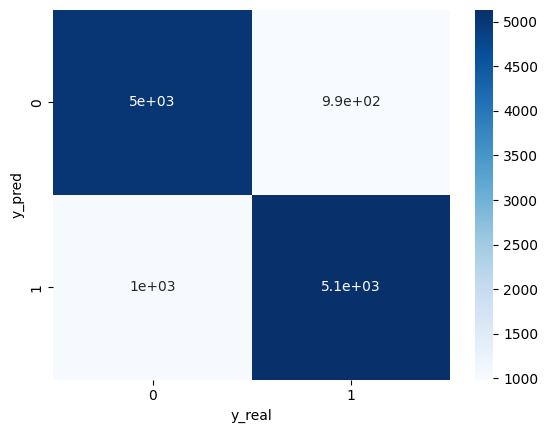

In [ ]:
y_predict = y_pred
y_predict_cat = np.where(y_predict > 0.4, 1, 0)

ds_validacion = pd.DataFrame(y_predict_cat, y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla = pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues')
plt.show()

###### Métricas de la red

In [ ]:
modelo_4 = KerasClassifier(build_fn=create_model4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-18-afdb08dcf0b2>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelo_4 = KerasClassifier(build_fn=create_model4)


In [ ]:
#{'batch_size': 64, 'epochs': 512}
model_metrics = modelo_4.fit(x_train_scaled, y_train,
                                                epochs = 512,
                                                batch_size = 64, verbose=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.77      0.96      0.86     24135
           1       0.95      0.71      0.82     24582

    accuracy                           0.84     48717
   macro avg       0.86      0.84      0.84     48717
weighted avg       0.86      0.84      0.84     48717

F1-Score: 0.8163094323814843


Text(50.722222222222214, 0.5, 'True')

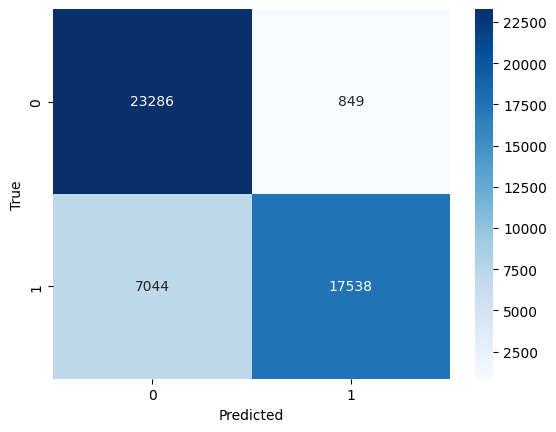

In [ ]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score

#Hago predicción sobre el set de evaluacion
y_pred = modelo_4.predict(x_train_scaled, verbose=False)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_train,y_pred))
print('F1-Score: {}'.format(f1_score(y_train, y_pred, average='binary'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(y_train,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

accuracy = accuracy_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Precision:", precision)

Accuracy: 0.8379826343986698
Recall: 0.7134488650231877
F1 Score: 0.8163094323814843
Precision: 0.953826072768804


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*   Accuracy : 0.8379826343986698

La precisión es una medida que evalúa cuántas de las predicciones del modelo fueron correctas en relación con el total de predicciones realizadas. En este caso, el modelo alcanzó una precisión del 83.79%.

*   Recall : 0.7134488650231877

Recall mide la capacidad del modelo para identificar correctamente todos los casos positivos en el conjunto de datos. Esto significa que el 71.34% de todos los casos positivos presentes en el conjunto de datos fueron identificados correctamente por el modelo.


*  F1 Score: 0.8163094323814843

El F1 Score es una métrica que combina accuracy y recall en una sola puntuación. Es útil cuando se busca un equilibrio entre la capacidad del modelo para predecir correctamente las clases positivas y negativas. En este caso, el F1 Score es de 0.8163094323814843, lo que indica un excelente equilibrio entre accuracy y recall.

*  Precision (Precisión): 0.953826072768804

La precisión se centra en cuántas de las predicciones positivas del modelo son realmente correctas. Un valor de 0.953826072768804 significa que el 95.38% de las predicciones positivas realizadas por el modelo son verdaderas.


###### Predicción sobre el dataset de test

In [ ]:
predict = best_grid.predict(dataset_test_scaled)

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

113/830 [===>..........................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


830/830 [==============================] - 1s 922us/step


0    13346
1    13189
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_redneuronal9.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
